# **Project Overview:**

### **Introduction:**
**Welcome to our project.**

This project focuses on exploring factors influencing hospital readmission rates among diabetic patients using the "Diabetes 130-US hospitals for years 1999-2008" dataset. Readmission refers to the return of patients to the hospital within a certain period after their initial discharge. The stakeholders for this project are hospitals and healthcare providers who aim to improve patient outcomes and reduce readmission rates. By analyzing the Diabetes 130-US Hospitals dataset, we aim to identify the key variables that contribute to readmissions and provide actionable insights for enhancing patient care.


### **Questions to Answer:**

1. What are the demographic, medical, and medication-related factors associated with hospital readmission rates among diabetic patients?

2. How can the identified factors be used to develop targeted interventions and strategies to reduce readmissions?

3. Are there specific lab results or diagnostic values that correlate with a higher likelihood of readmission among diabetic patients?

### **Problem Statement:**
The problem we address is the challenge of high hospital readmission rates among diabetic patients. Understanding the contributing factors can enable hospitals to implement targeted interventions, optimize care delivery, and improve patient outcomes.

### **Objectives:**
The main objectives of this project are as follows:

1. Identify the factors influencing hospital readmission rates among diabetic patients using the Diabetes 130-US Hospitals dataset.

2. Develop insights into patient demographics, medical history, medications, and lab results that are significantly associated with readmission rates.

3. Provide recommendations for interventions and strategies to reduce readmission rates and improve the quality of care for diabetic patients.


Exploratory Data Analysis (EDA): Perform a comprehensive analysis of the "Diabetes 130-US hospitals for years 1999-2008" dataset to gain insights into patient demographics, medical history, medications, and other relevant factors. Identify patterns, trends, and correlations within the data.

Feature Engineering and Selection: Preprocess the dataset by handling missing values, transforming variables if necessary, and selecting the most relevant features for predicting readmission. This step aims to enhance the quality and relevance of the data for modeling.

Build Predictive Model: Develop a predictive model using appropriate machine learning algorithms to estimate the probability of readmission for diabetic patients. Evaluate and fine-tune the model to achieve optimal performance.

Interpretation and Insights: Interpret the results of the predictive model and provide insights into the factors that significantly impact readmission rates. Identify the most influential variables and their relative importance in predicting readmission.

### **About the Data:**
The "Diabetes 130-US hospitals for years 1999-2008" dataset contains information from 130 US hospitals and covers a time period spanning from 1999 to 2008. It includes various features such as patient demographics (e.g., age, gender, race), medical history (e.g., previous diagnoses, procedures), medications, and laboratory results. The dataset consists of over 100,000 instances, providing a substantial amount of data for analysis and modeling. Additionally, the dataset includes a weight column that can be utilized for further analysis or modeling purposes. The dataset can be accessed through the provided link: https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008

## **1. DATA UNDERSTANDING**

Importing libraries that will be used in this notebook.

In [1]:
#Importing the Necessary Libraries
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv('diabetic_data.csv')
data

encounter_id  patient_nbr             race  gender      age weight  \
0            2278392      8222157        Caucasian  Female   [0-10)      ?   
1             149190     55629189        Caucasian  Female  [10-20)      ?   
2              64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3             500364     82442376        Caucasian    Male  [30-40)      ?   
4              16680     42519267        Caucasian    Male  [40-50)      ?   
...              ...          ...              ...     ...      ...    ...   
101761     443847548    100162476  AfricanAmerican    Male  [70-80)      ?   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)      ?   
101763     443854148     41088789        Caucasian    Male  [70-80)      ?   
101764     443857166     31693671        Caucasian  Female  [80-90)      ?   
101765     443867222    175429310        Caucasian    Male  [70-80)      ?   

        admission_type_id  discharge_disposition_id  admission_source_id  \
0                       6                        25                    1   
1                       1                         1                    7   
2                       1                         1                    7   
3                       1                         1                    7   
4                       1                         1                    7   
...                   ...                       ...                  ...   
101761                  1                         3                    7   
101762                  1                         4                    5   
101763                  1                         1                    7   
101764                  2                         3                    7   
101765                  1                         1                    7   

        time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                      1  ...          No      No                   No   
1                      3  ...          No      Up                   No   
2                      2  ...          No      No                   No   
3                      2  ...          No      Up                   No   
4                      1  ...          No  Steady                   No   
...                  ...  ...         ...     ...                  ...   
101761                 3  ...          No    Down                   No   
101762                 5  ...          No  Steady                   No   
101763                 1  ...          No    Down                   No   
101764                10  ...          No      Up                   No   
101765                 6  ...          No      No                   No   

        glipizide-metformin  glimepiride-pioglitazone  \
0                        No                        No   
1                        No                        No   
2                        No                        No   
3                        No                        No   
4                        No                        No   
...                     ...                       ...   
101761                   No                        No   
101762                   No                        No   
101763                   No                        No   
101764                   No                        No   
101765                   No                        No   

        metformin-rosiglitazone  metformin-pioglitazone  change diabetesMed  \
0                            No                      No      No          No   
1                            No                      No      Ch         Yes   
2                            No                      No      No         Yes   
3                            No                      No      Ch         Yes   
4                            No                      No      Ch         Yes   
...                         ...                     ...     ...         ...   
101761                       No

- The dataset contains 101,766 rows, indicating that there are records for a large number of encounters in the hospital.

- The dataset has 50 columns, providing a wide range of information about each encounter.

- Some columns appear to have missing values denoted by "?", which may need to be addressed before doing analysis.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [4]:
data.isna().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

The data shows no missing values. However, the missing values are denoted by "?"

In [5]:
# Find columns with "?" values
columns_with_question_mark = []
for column in data.columns:
    if data[column].dtype == 'object' and data[column].str.contains('\?').any():
        columns_with_question_mark.append(column)

# Create a DataFrame to store the results
result_df = pd.DataFrame(columns=['Column', 'Number of "?"', 'Percentage'])

# Calculate and store the values in the DataFrame
for column in columns_with_question_mark:
    question_mark_count = data[column].str.count('\?').sum()
    total_count = len(data[column])
    percentage = (question_mark_count / total_count) * 100
    result_df = result_df.append({'Column': column, 'Number of "?"': question_mark_count, 'Percentage': percentage}, ignore_index=True)

# Print the result DataFrame
result_df

Column Number of "?"  Percentage
0               race          2273    2.233555
1             weight         98569   96.858479
2         payer_code         40256   39.557416
3  medical_specialty         49949   49.082208
4             diag_1            21    0.020636
5             diag_2           358    0.351787
6             diag_3          1423    1.398306

- The dataset contains missing values represented by "?" in multiple columns. 
- The "weight" column has the highest percentage of missing values, with 96.86% of the entries being "?". 

In [6]:
def replace_question_mark(df):

    # Iterate over each column in the DataFrame
    for column in df.columns:
        
        # Replace '?' with NaN using numpy's nan value
        df[column] = df[column].replace('?', np.nan)

    return df

replace_question_mark(data)

encounter_id  patient_nbr             race  gender      age weight  \
0            2278392      8222157        Caucasian  Female   [0-10)    NaN   
1             149190     55629189        Caucasian  Female  [10-20)    NaN   
2              64410     86047875  AfricanAmerican  Female  [20-30)    NaN   
3             500364     82442376        Caucasian    Male  [30-40)    NaN   
4              16680     42519267        Caucasian    Male  [40-50)    NaN   
...              ...          ...              ...     ...      ...    ...   
101761     443847548    100162476  AfricanAmerican    Male  [70-80)    NaN   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)    NaN   
101763     443854148     41088789        Caucasian    Male  [70-80)    NaN   
101764     443857166     31693671        Caucasian  Female  [80-90)    NaN   
101765     443867222    175429310        Caucasian    Male  [70-80)    NaN   

        admission_type_id  discharge_disposition_id  admission_source_id  \
0                       6                        25                    1   
1                       1                         1                    7   
2                       1                         1                    7   
3                       1                         1                    7   
4                       1                         1                    7   
...                   ...                       ...                  ...   
101761                  1                         3                    7   
101762                  1                         4                    5   
101763                  1                         1                    7   
101764                  2                         3                    7   
101765                  1                         1                    7   

        time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                      1  ...          No      No                   No   
1                      3  ...          No      Up                   No   
2                      2  ...          No      No                   No   
3                      2  ...          No      Up                   No   
4                      1  ...          No  Steady                   No   
...                  ...  ...         ...     ...                  ...   
101761                 3  ...          No    Down                   No   
101762                 5  ...          No  Steady                   No   
101763                 1  ...          No    Down                   No   
101764                10  ...          No      Up                   No   
101765                 6  ...          No      No                   No   

        glipizide-metformin  glimepiride-pioglitazone  \
0                        No                        No   
1                        No                        No   
2                        No                        No   
3                        No                        No   
4                        No                        No   
...                     ...                       ...   
101761                   No                        No   
101762                   No                        No   
101763                   No                        No   
101764                   No                        No   
101765                   No                        No   

        metformin-rosiglitazone  metformin-pioglitazone  change diabetesMed  \
0                            No                      No      No          No   
1                            No                      No      Ch         Yes   
2                            No                      No      No         Yes   
3                            No                      No      Ch         Yes   
4                            No                      No      Ch         Yes   
...                         ...                     ...     ...         ...   
101761                       No

- Converted the '?' which indicated missing values to NaN.

In [7]:
def print_missing_values(df):
    # Find columns with missing values
    columns_with_missing_values = df.columns[df.isnull().any()]

    # Create a DataFrame to store the results
    result_df = pd.DataFrame(columns=['Column', 'Missing Values', 'Percentage'])

    # Calculate and store the values in the DataFrame
    for column in columns_with_missing_values:
        missing_count = df[column].isnull().sum()
        total_count = len(df[column])
        percentage = (missing_count / total_count) * 100
        result_df = result_df.append({'Column': column, 'Missing Values': missing_count, 'Percentage': percentage}, ignore_index=True)

    # Print the results
    print(result_df)

# Usage:
print_missing_values(data)


              Column Missing Values  Percentage
0               race           2273    2.233555
1             weight          98569   96.858479
2         payer_code          40256   39.557416
3  medical_specialty          49949   49.082208
4             diag_1             21    0.020636
5             diag_2            358    0.351787
6             diag_3           1423    1.398306



After converting the "?" values to 'NaN', the "weight" column still has a high percentage of missing values, with almost all entries missing (approximately 96.86%).

## **1. Initial Data Exploration**

### **1. Categorical columns**

In [8]:
def print_categorical_columns(df):
    # Find categorical columns
    categorical_columns = df.select_dtypes(include='object').columns

    # Print the column names
    for column in categorical_columns:
        print(column)

print_categorical_columns(data)

race
gender
age
weight
payer_code
medical_specialty
diag_1
diag_2
diag_3
max_glu_serum
A1Cresult
metformin
repaglinide
nateglinide
chlorpropamide
glimepiride
acetohexamide
glipizide
glyburide
tolbutamide
pioglitazone
rosiglitazone
acarbose
miglitol
troglitazone
tolazamide
examide
citoglipton
insulin
glyburide-metformin
glipizide-metformin
glimepiride-pioglitazone
metformin-rosiglitazone
metformin-pioglitazone
change
diabetesMed
readmitted


There are quite a number of categorical columns

Value Counts:
Caucasian          76099
AfricanAmerican    19210
NaN                 2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64


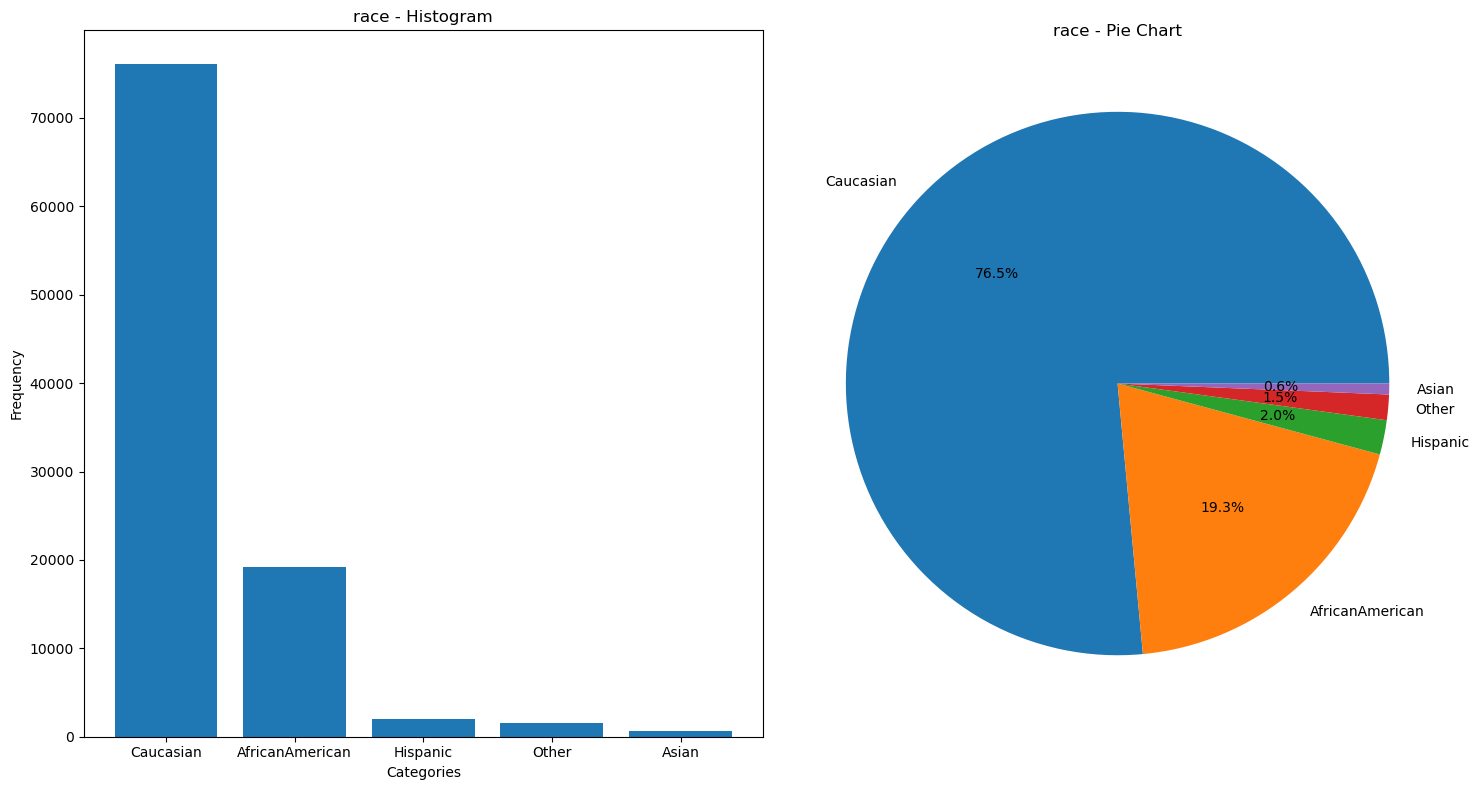

In [9]:
def plot_histogram_pie(column):
    if isinstance(column, str):
        column = data[column]
    elif not isinstance(column, pd.Series):
        raise ValueError("Invalid input. Please provide a pandas Series or DataFrame column.")

    # Print the values
    print("Value Counts:")
    print(column.value_counts(dropna=False))

    # Plot the histogram and pie chart
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

    # Plot the histogram
    ax1.bar(column.value_counts().index, column.value_counts().values)
    ax1.set_title(column.name + ' - Histogram')
    ax1.set_xlabel('Categories')
    ax1.set_ylabel('Frequency')

    # Plot the pie chart
    ax2.pie(column.value_counts().values, labels=column.value_counts().index, autopct='%1.1f%%')
    ax2.set_title(column.name + ' - Pie Chart')

    # Display the plots
    plt.tight_layout()
    plt.show()

plot_histogram_pie('race')


The race distribution in the dataset shows that the majority of patients are Caucasian, accounting for approximately 76,099 instances. 

African Americans are the second largest racial group, with 19,210 instances. 

Notably, there are 2,273 instances where the race information is missing.

Value Counts:
Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64


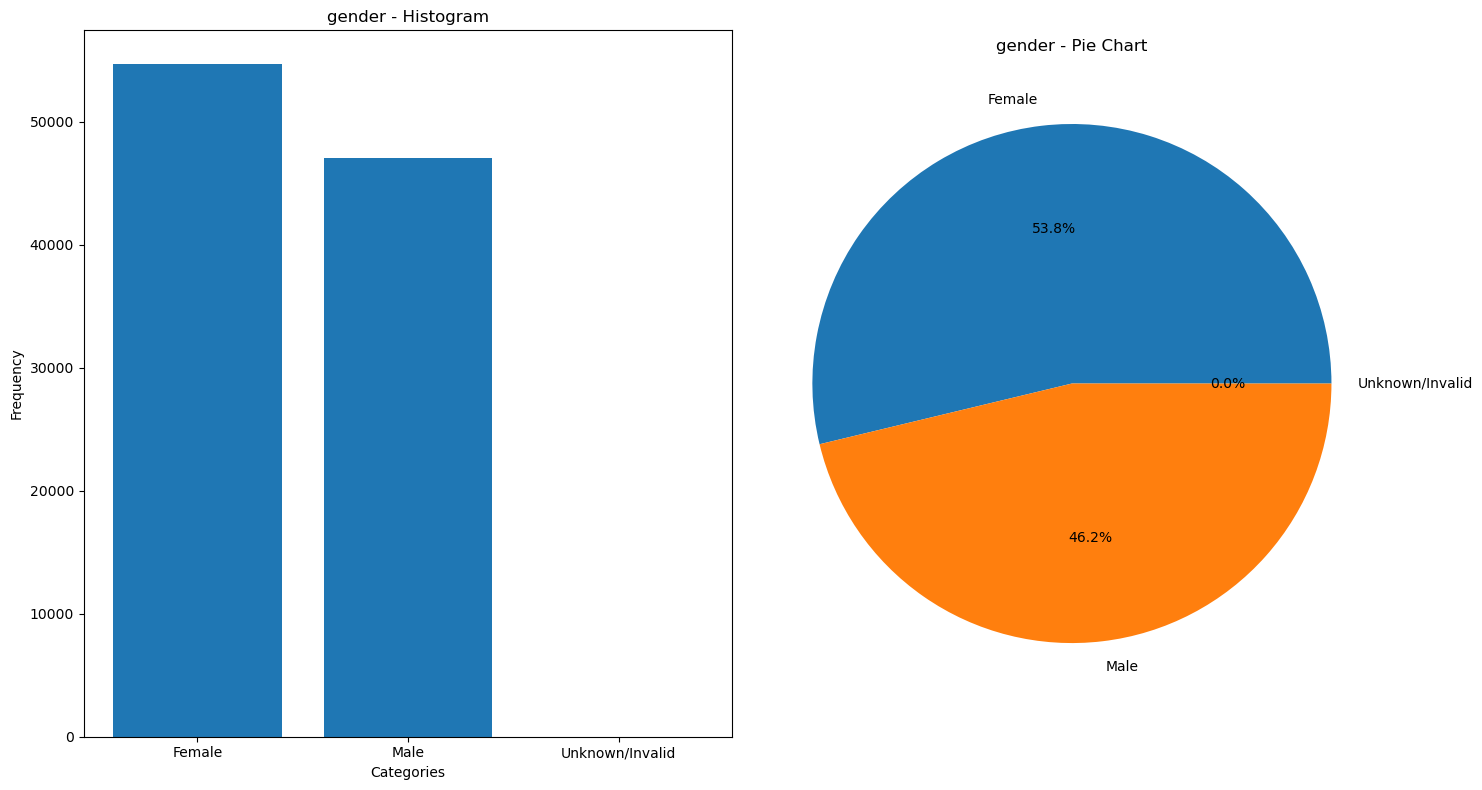

In [10]:
plot_histogram_pie('gender')

The gender distribution in the dataset indicates that there are more female patients, with approximately 54,708 instances. 

Male patients follow closely behind with 47,055 instances. 

However, there are only three instances where the gender is classified as "Unknown/Invalid."

Value Counts:
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64


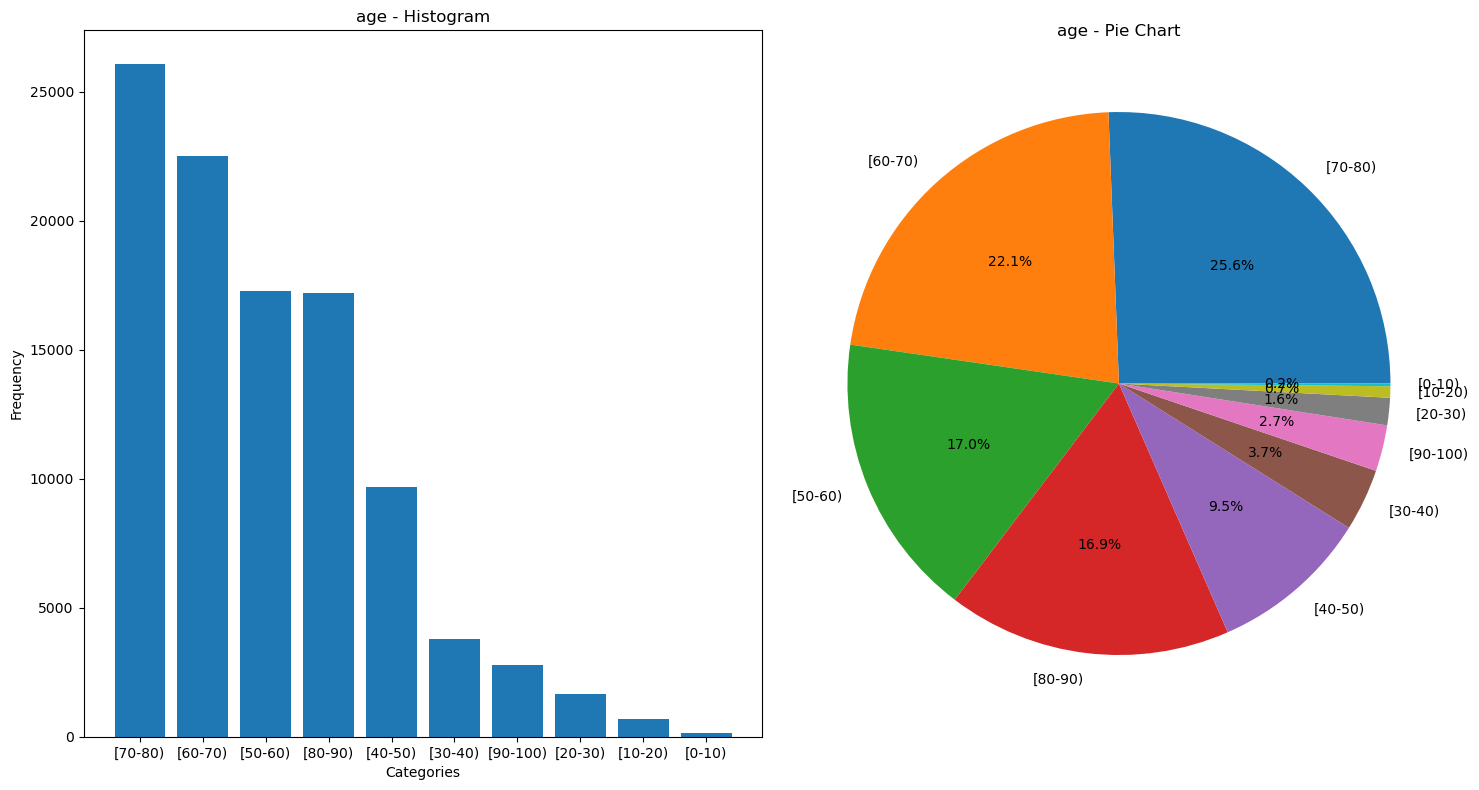

In [11]:
plot_histogram_pie('age')

The age distribution in the dataset reveals that the largest patient group falls within the age range of 70-80, with 26,068 instances. 

This is followed by the age range of 60-70, which has 22,483 instances. 

The distribution shows a gradual decline in the number of instances as the age range decreases, with the smallest group being patients aged 0-10, comprising only 161 instances. 

Understanding the age distribution can help in tailoring healthcare interventions and treatment plans according to the specific needs of different age groups.

Value Counts:
NaN          98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64


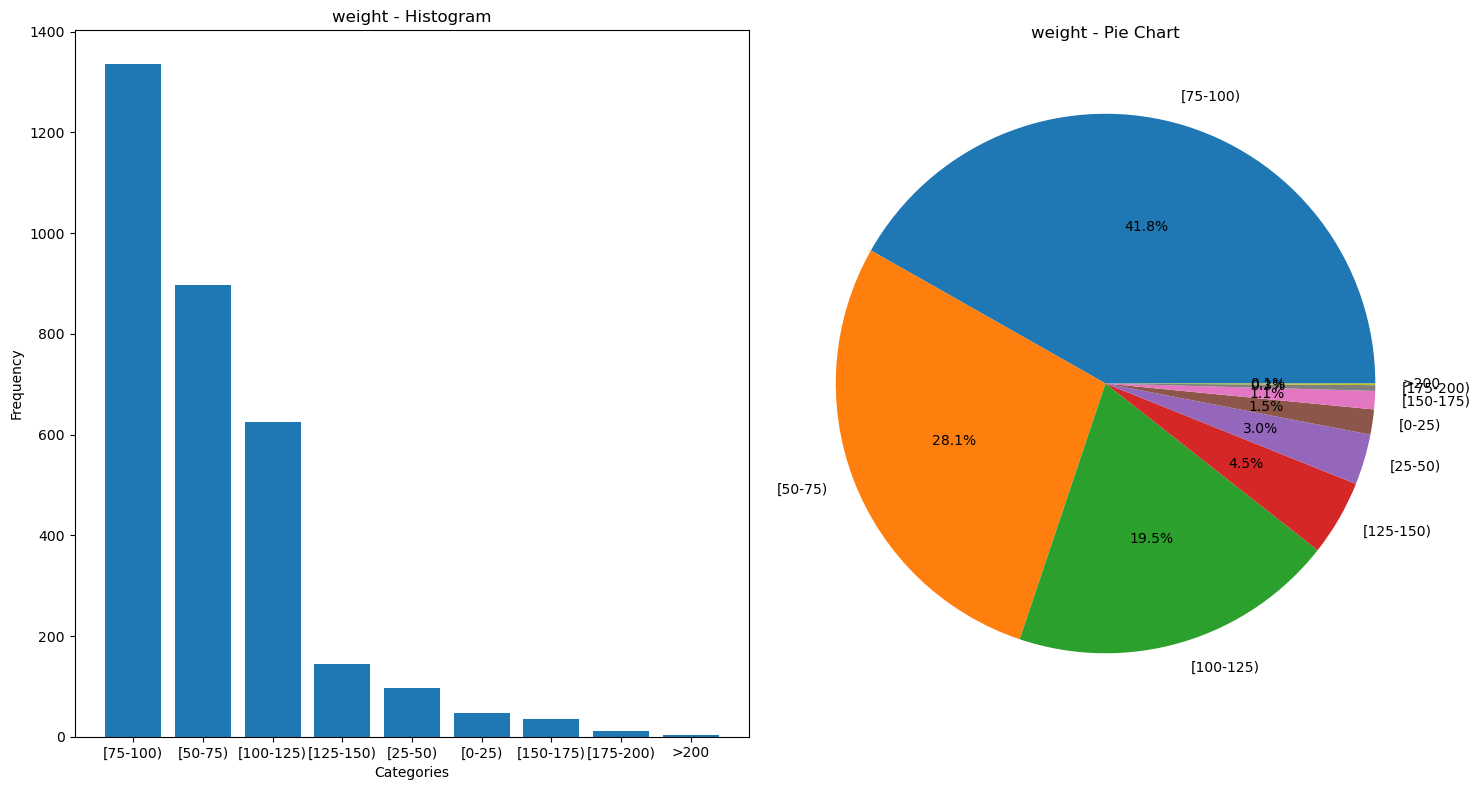

In [12]:
plot_histogram_pie('weight')

The weight column in the dataset has a large number of missing values, with 98,569 instances marked as "Missing". 

Among the available weight values, the majority fall within the range of 75-100, with 1,336 instances. There are also smaller numbers of instances in other weight ranges, such as [50-75], [100-125], [125-150], [25-50], [0-25], [150-175], [175-200], and >200. 

The high number of missing values in the weight column poses a challenge for analyzing weight-related insights.

Value Counts:
NaN    40256
MC     32439
HM      6274
SP      5007
BC      4655
MD      3532
CP      2533
UN      2448
CM      1937
OG      1033
PO       592
DM       549
CH       146
WC       135
OT        95
MP        79
SI        55
FR         1
Name: payer_code, dtype: int64


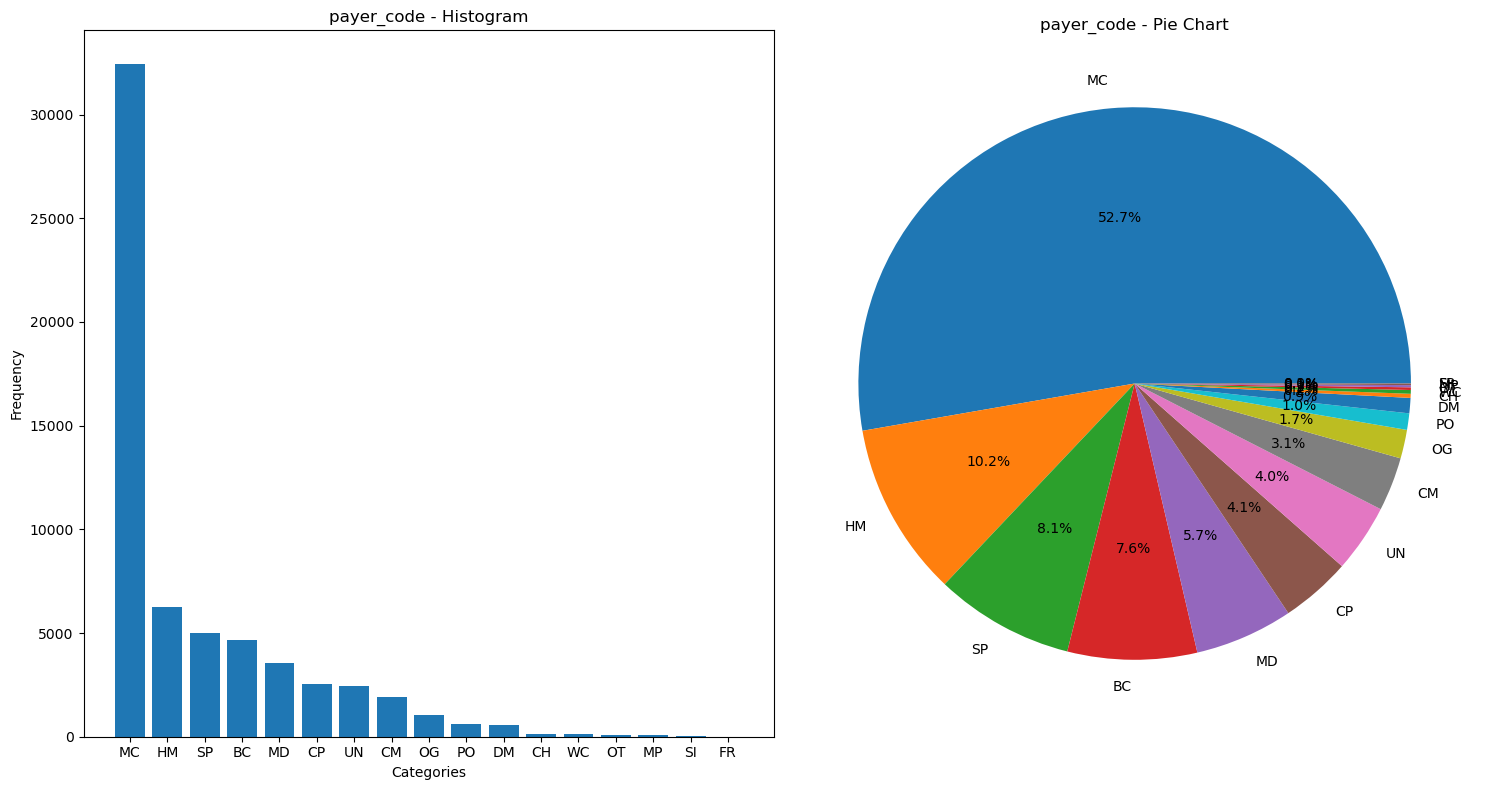

In [13]:
plot_histogram_pie('payer_code')

The payer_code column in the dataset exhibits a considerable number of missing values, with 40,256 instances marked as "Missing." 

Among the available values, the most frequent payer code is "MC" (Medicare), with 32,439 instances. Other common payer codes include "HM" (Medicaid) with 6,274 instances, "SP" (Sponsored/Charity) with 5,007 instances, and "BC" (Blue Cross/Blue Shield) with 4,655 instances. 

The presence of various payer codes indicates the diverse insurance coverage of patients in the dataset, which can have implications for healthcare utilization and reimbursement.

Value Counts:
NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64


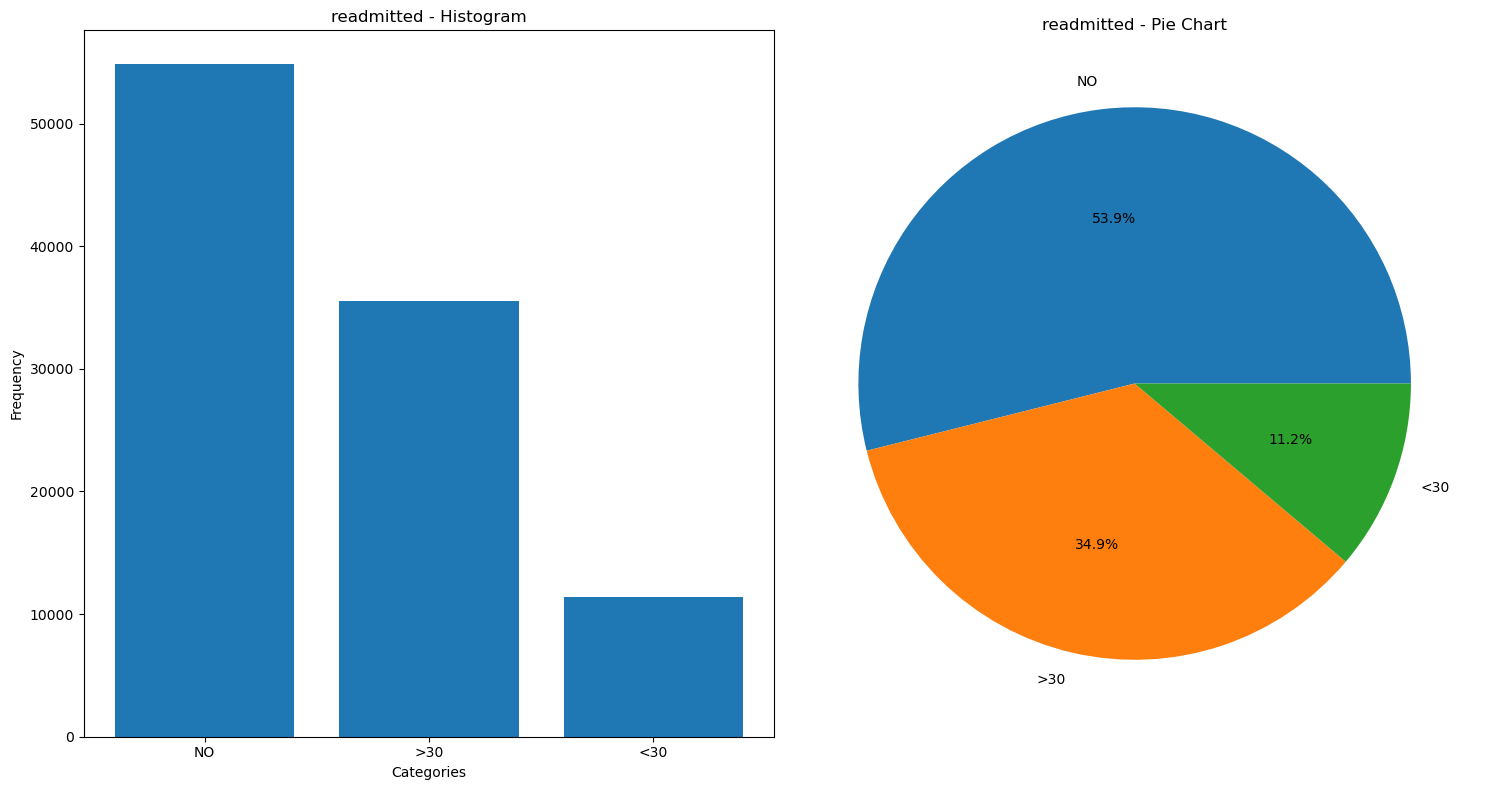

In [14]:
plot_histogram_pie('readmitted')

The "readmitted" column in the dataset indicates the readmission status of patients. 

The majority of patients, with 54,864 instances, were not readmitted to the hospital. On the other hand, 35,545 instances show patients who were readmitted after 30 days of their initial discharge. Additionally, there are 11,357 instances where patients were readmitted within 30 days.

Understanding the readmission status can help identify factors that contribute to readmission and inform strategies for improving patient care and reducing readmission rates.

Value Counts:
NaN                              49949
InternalMedicine                 14635
Emergency/Trauma                  7565
Family/GeneralPractice            7440
Cardiology                        5352
                                 ...  
SportsMedicine                       1
Speech                               1
Perinatology                         1
Neurophysiology                      1
Pediatrics-InfectiousDiseases        1
Name: medical_specialty, Length: 73, dtype: int64


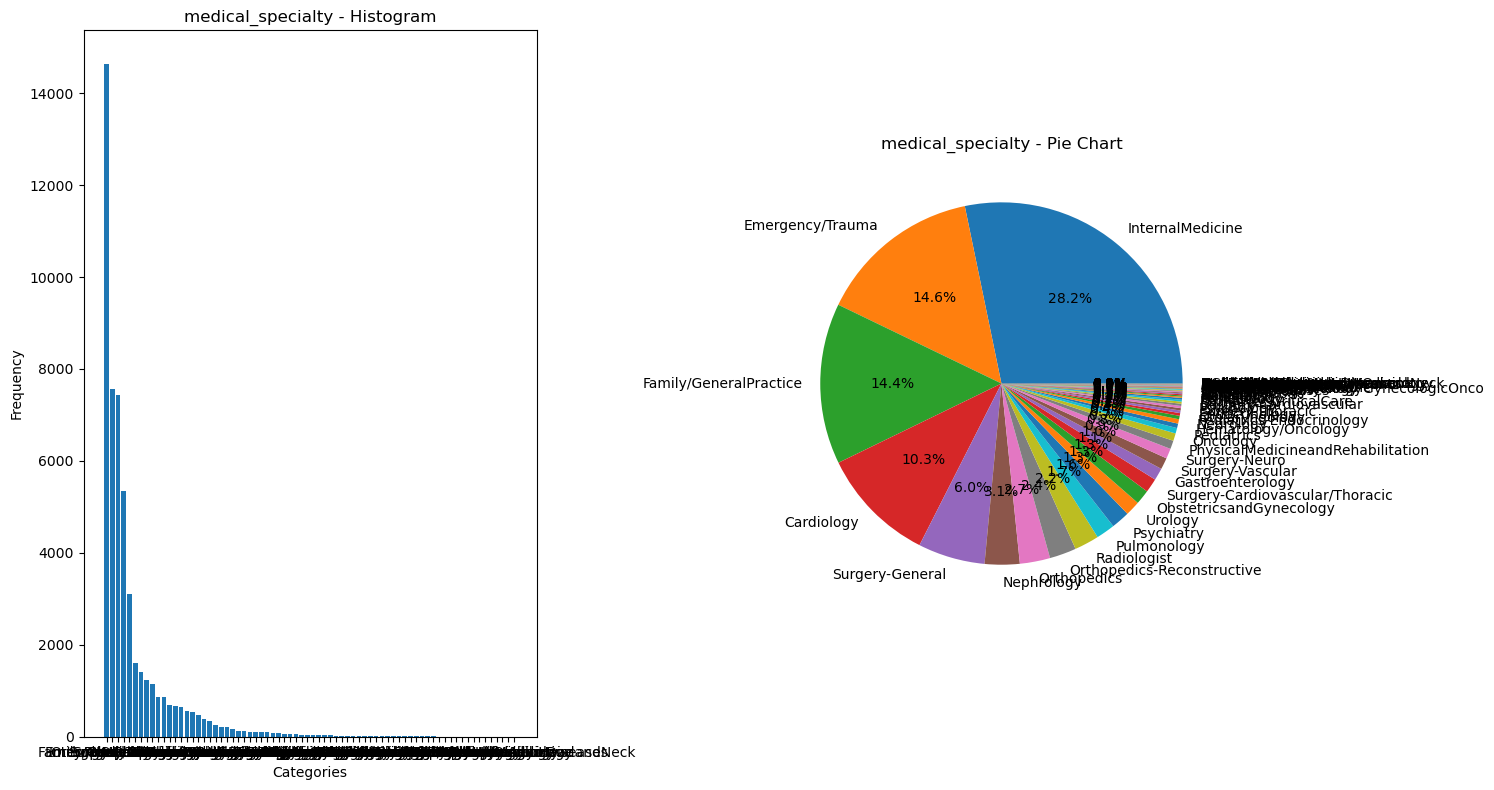

In [15]:
plot_histogram_pie('medical_specialty')

The "medical_specialty" column in the dataset shows a significant number of missing values, with 49,949 instances marked as "Missing." 

Among the available values, the most common medical specialty is "InternalMedicine" with 14,635 instances, followed by "Emergency/Trauma" with 7,565 instances and "Family/GeneralPractice" with 7,440 instances. 

There are various other medical specialties represented in the dataset, indicating the diverse range of specialties involved in patient care. 

Value Counts:
None    96420
Norm     2597
>200     1485
>300     1264
Name: max_glu_serum, dtype: int64


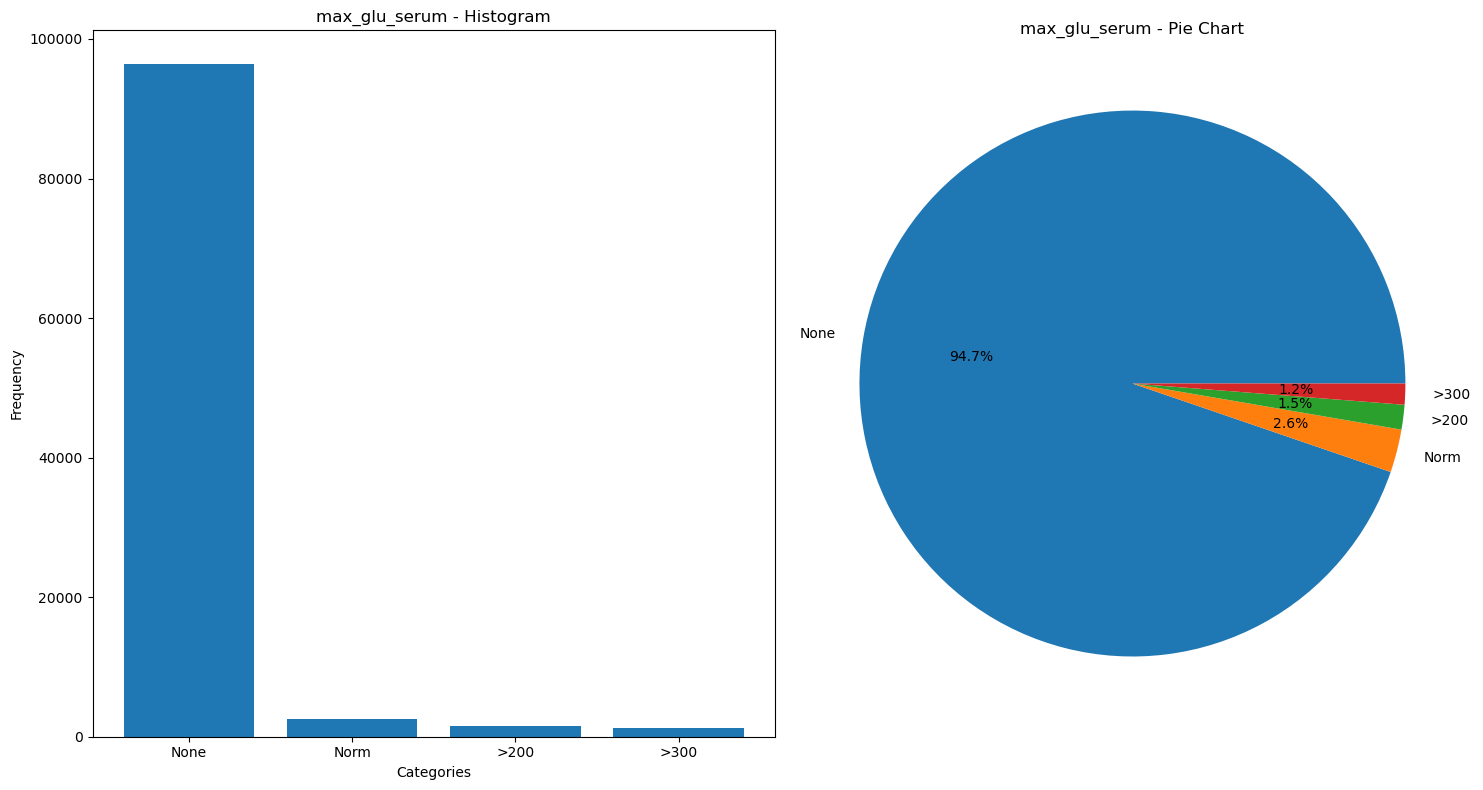

In [16]:
plot_histogram_pie('max_glu_serum')

The "max_glu_serum" column in the dataset provides information about the maximum glucose serum test result for patients. 

The majority of patients, with 96,420 instances, have a test result of "None," indicating a normal glucose level. 

There are also instances where patients have elevated glucose levels, with 2,597 instances classified as "Norm," 1,485 instances with a value greater than 200, and 1,264 instances with a value greater than 300. 

Monitoring and understanding glucose levels can be crucial in managing diabetes and other related conditions, and this information can help identify patients who may require additional interventions or treatments.

Value Counts:
None    84748
>8       8216
Norm     4990
>7       3812
Name: A1Cresult, dtype: int64


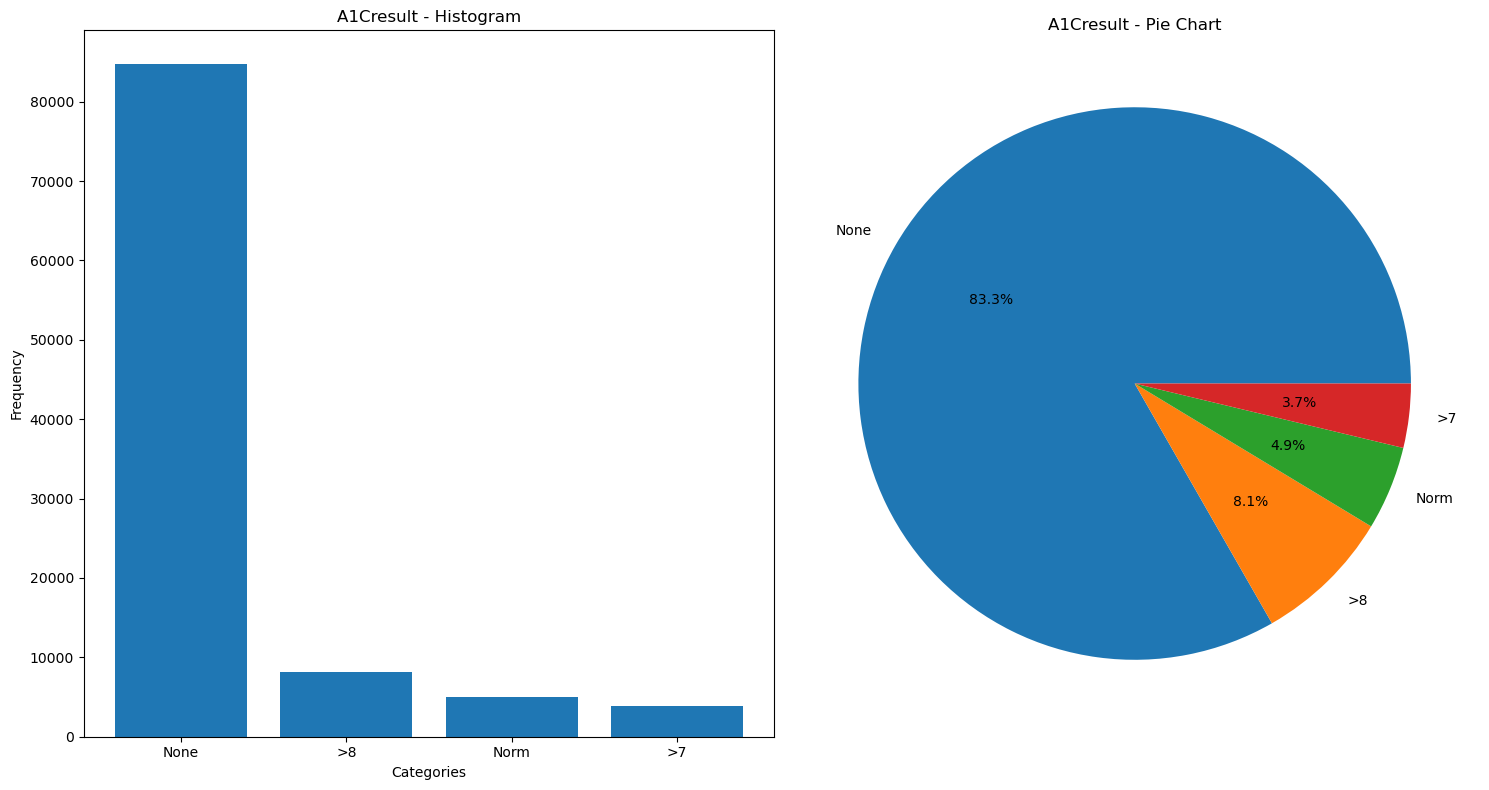

In [17]:
plot_histogram_pie('A1Cresult')

The "A1Cresult" column in the dataset provides information about the A1C test results for patients, which measures the average blood glucose levels over the past few months. 

The majority of patients, with 84,748 instances, have a test result of "None," indicating that an A1C test was not performed or the result is not available. 

There are instances where patients have A1C levels above the normal range, with 8,216 instances classified as ">8" and 3,812 instances as ">7."

Additionally, there are 4,990 instances where the A1C result falls within the normal range ("Norm"). 

Monitoring A1C levels is crucial in managing diabetes and evaluating long-term blood glucose control.

Value Counts:
No        81778
Steady    18346
Up         1067
Down        575
Name: metformin, dtype: int64


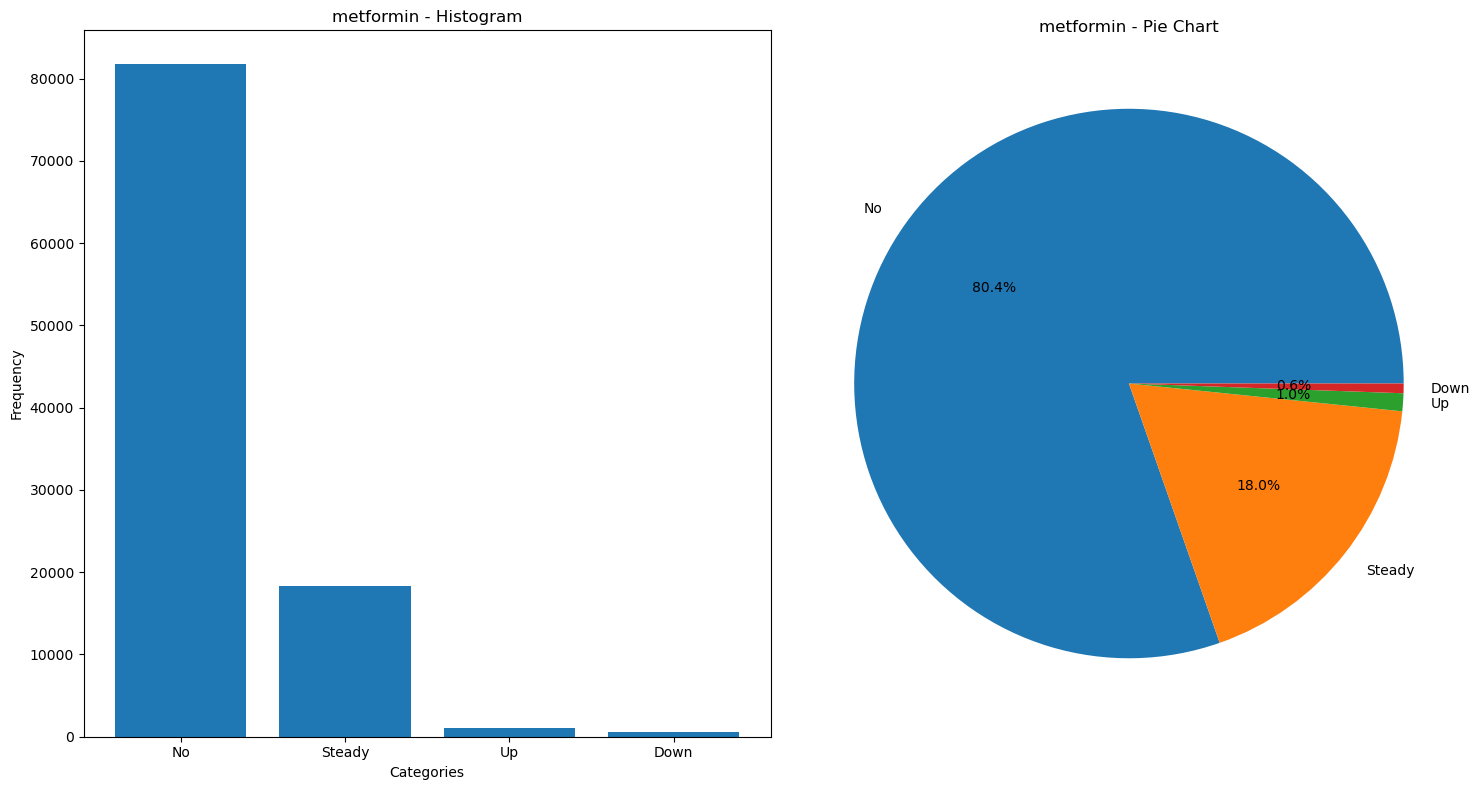

In [18]:
plot_histogram_pie('metformin')

The "metformin" column in the dataset indicates the medication dosage change for the drug metformin. 

The majority of patients, with 81,778 instances, have no change in the dosage ("No"). 

There are instances where the dosage is kept steady ("Steady") for 18,346 patients. 

Additionally, there are 1,067 instances where the dosage is increased ("Up") and 575 instances where the dosage is decreased ("Down"). 

Monitoring and managing medication dosages, such as metformin, are essential in diabetes management to achieve optimal treatment outcomes.

Value Counts:
No        100227
Steady      1384
Up           110
Down          45
Name: repaglinide, dtype: int64


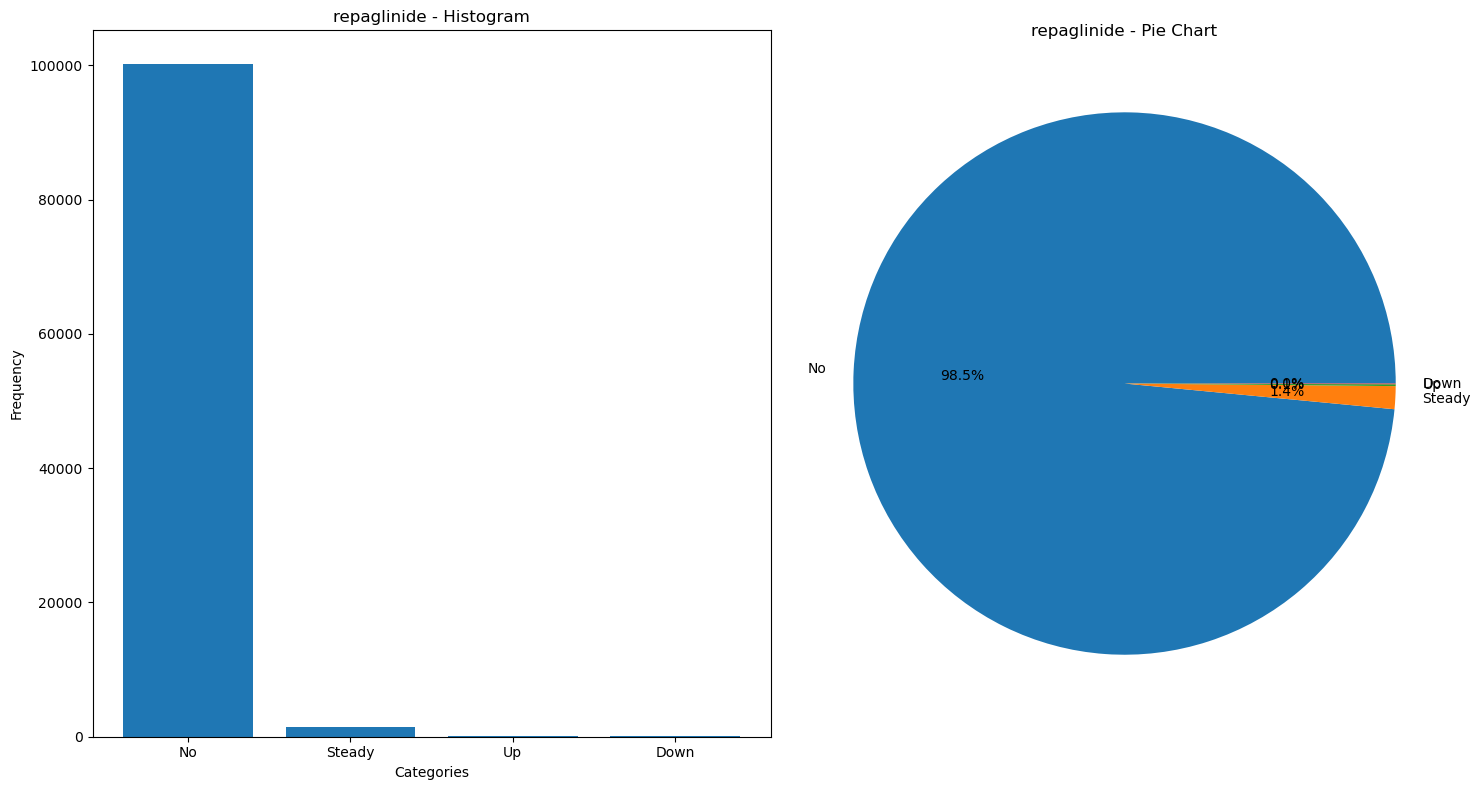

In [19]:
plot_histogram_pie('repaglinide')

The "repaglinide" column in the dataset represents the medication dosage change for the drug repaglinide. 

The majority of patients, with 100,227 instances, have no change in the dosage ("No"). 

There are instances where the dosage is kept steady ("Steady") for 1,384 patients. 

Additionally, there are 110 instances where the dosage is increased ("Up") and 45 instances where the dosage is decreased ("Down"). 

Monitoring and managing medication dosages, such as repaglinide, are important in diabetes management to ensure effective control of blood sugar levels.

Value Counts:
No        101063
Steady       668
Up            24
Down          11
Name: nateglinide, dtype: int64


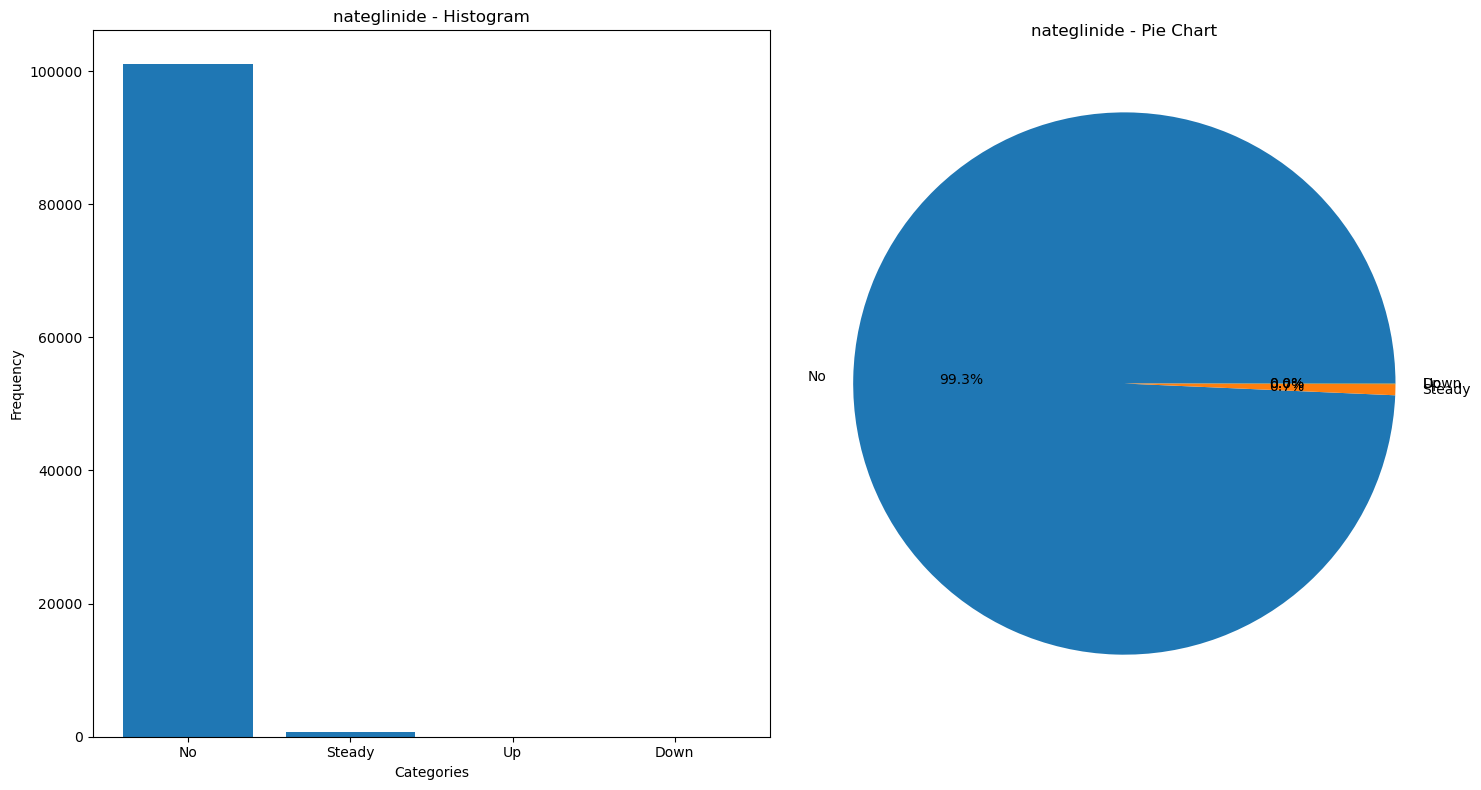

In [20]:
plot_histogram_pie('nateglinide')

The "nateglinide" column in the dataset represents the medication dosage change for the drug nateglinide. 

The majority of patients, with 101,063 instances, have no change in the dosage ("No"). 

There are instances where the dosage is kept steady ("Steady") for 668 patients. 

Additionally, there are 24 instances where the dosage is increased ("Up") and 11 instances where the dosage is decreased ("Down"). 

Monitoring and managing medication dosages, such as nateglinide, are important in diabetes management to ensure effective control of blood sugar levels.

Value Counts:
No        101680
Steady        79
Up             6
Down           1
Name: chlorpropamide, dtype: int64


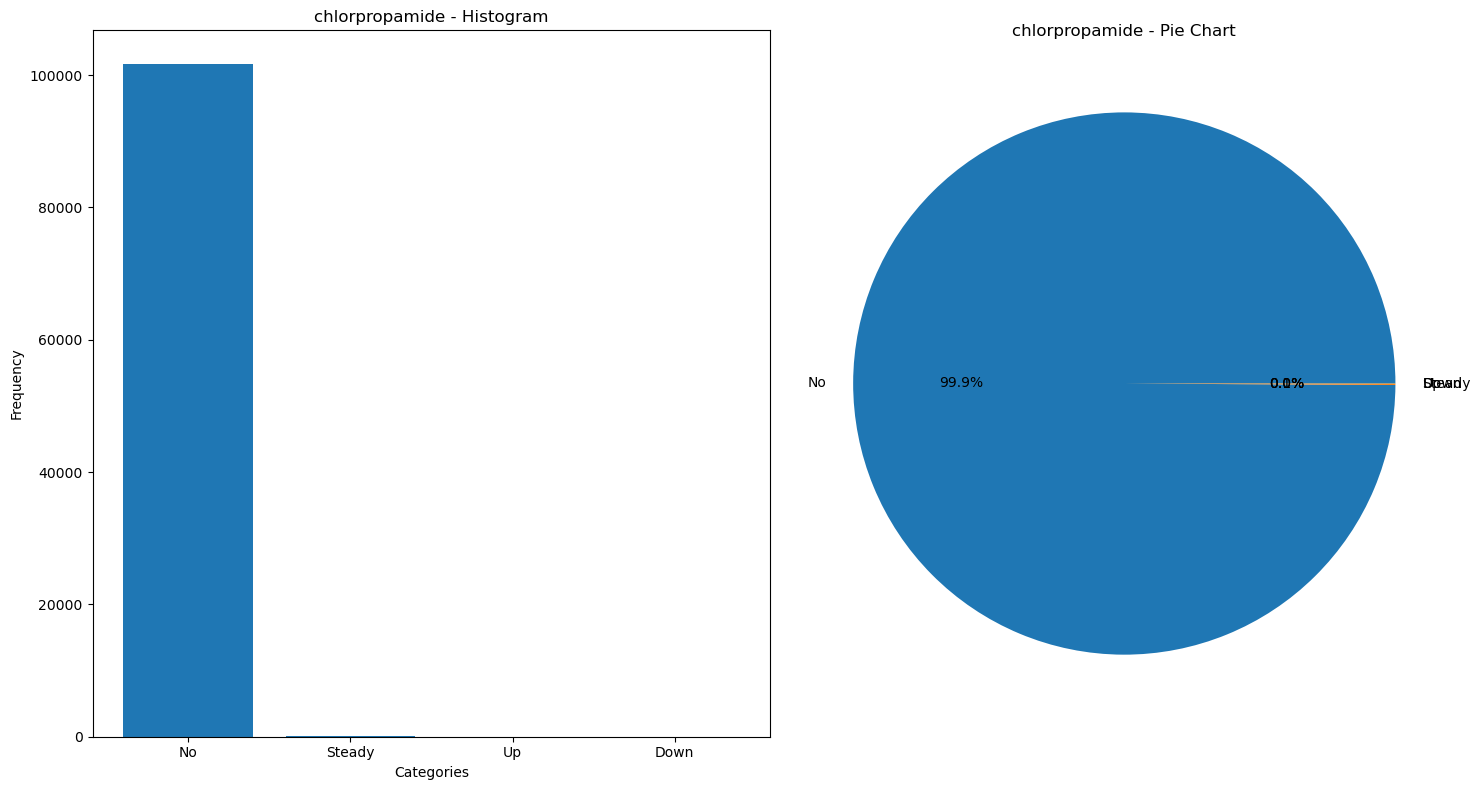

In [21]:
plot_histogram_pie('chlorpropamide')

The "chlorpropamide" column in the dataset represents the medication dosage change for the drug chlorpropamide. 

The majority of patients, with 101,680 instances, have no change in the dosage ("No"). 

There are instances where the dosage is kept steady ("Steady") for 79 patients. 

Additionally, there are 6 instances where the dosage is increased ("Up") and 1 instance where the dosage is decreased ("Down"). 

Monitoring and managing medication dosages, such as chlorpropamide, are important in diabetes management to ensure effective control of blood sugar levels.

Value Counts:
No        96575
Steady     4670
Up          327
Down        194
Name: glimepiride, dtype: int64


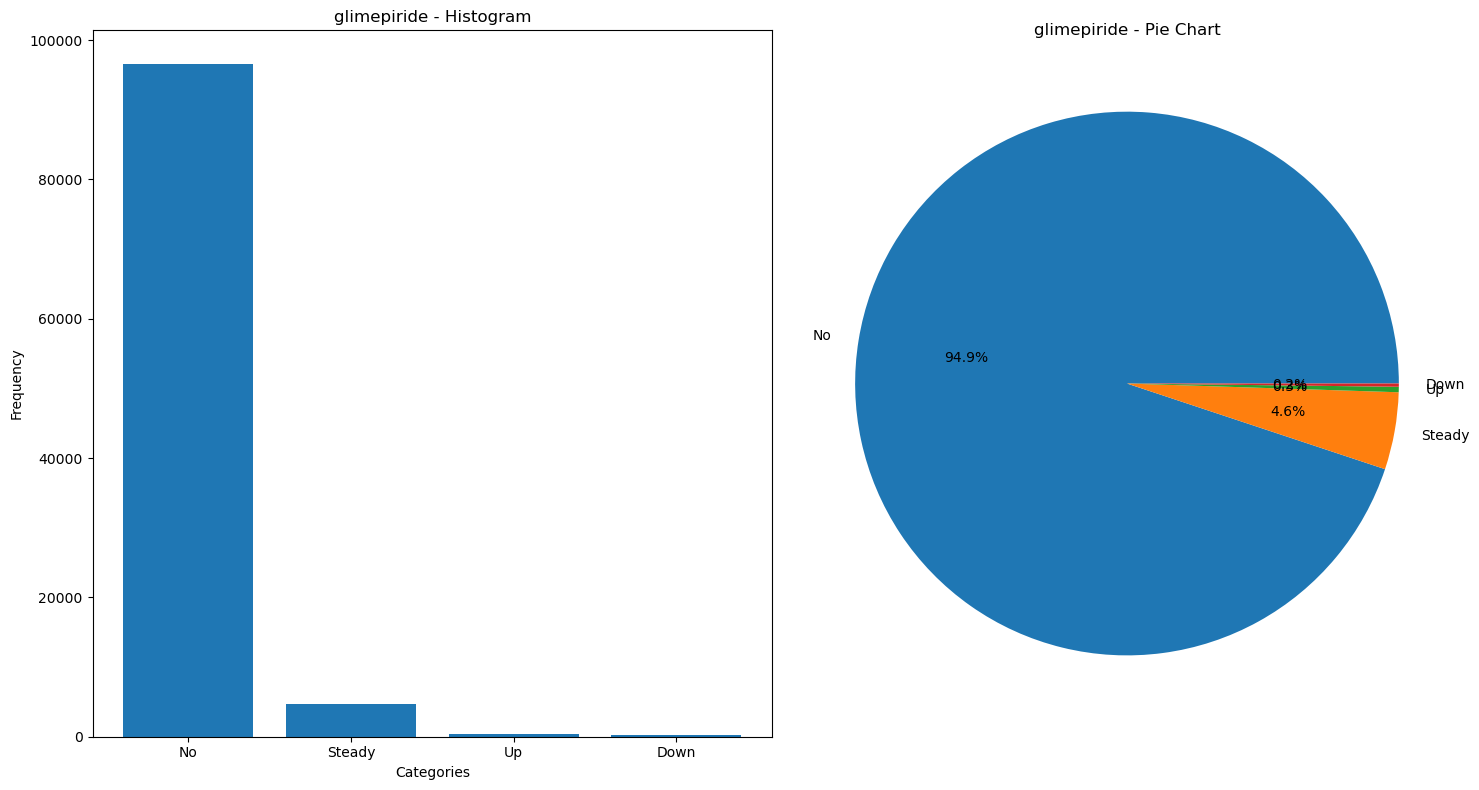

In [22]:
plot_histogram_pie('glimepiride')

The "glimepiride" column in the dataset represents the medication dosage change for the drug glimepiride. 

The majority of patients, with 96,575 instances, have no change in the dosage ("No"). 

There are instances where the dosage is kept steady ("Steady") for 4,670 patients. 

Additionally, there are 327 instances where the dosage is increased ("Up") and 194 instances where the dosage is decreased ("Down").

Value Counts:
No        101765
Steady         1
Name: acetohexamide, dtype: int64


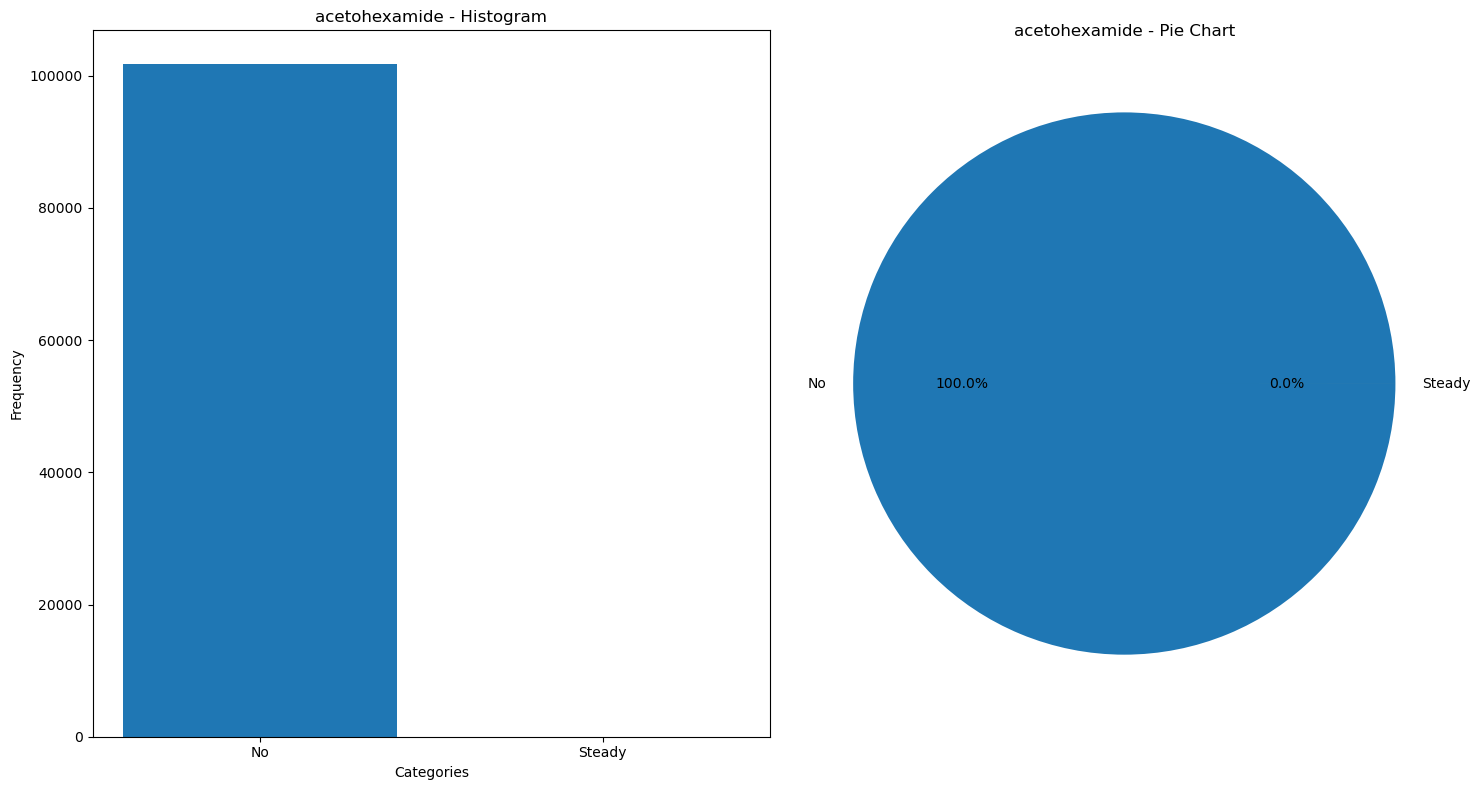

In [23]:
plot_histogram_pie('acetohexamide')

The "acetohexamide" column in the dataset represents the medication dosage change for the drug acetohexamide. 

The majority of patients, with 101,765 instances, have no change in the dosage ("No"). There is only 1 instance where the dosage is kept steady ("Steady"). 

Value Counts:
No        89080
Steady    11356
Up          770
Down        560
Name: glipizide, dtype: int64


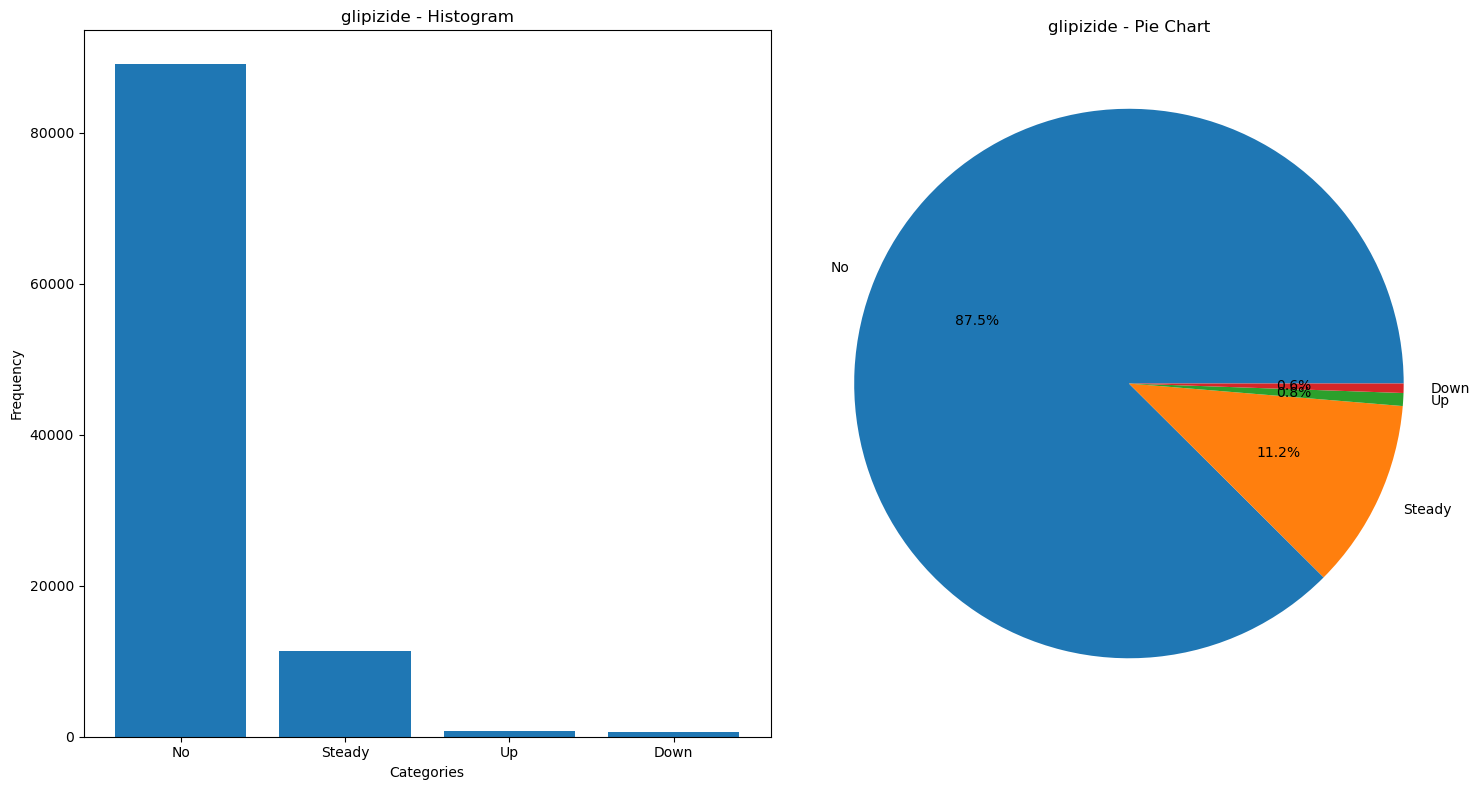

In [24]:
plot_histogram_pie('glipizide')

The "glipizide" column in the dataset represents the medication dosage change for the drug glipizide. 

The majority of patients, with 89,080 instances, have no change in the dosage ("No"). 

There are instances where the dosage is kept steady ("Steady") for 11,356 patients. Additionally, there are 770 instances where the dosage is increased ("Up") and 560 instances where the dosage is decreased ("Down"). 

Value Counts:
No        91116
Steady     9274
Up          812
Down        564
Name: glyburide, dtype: int64


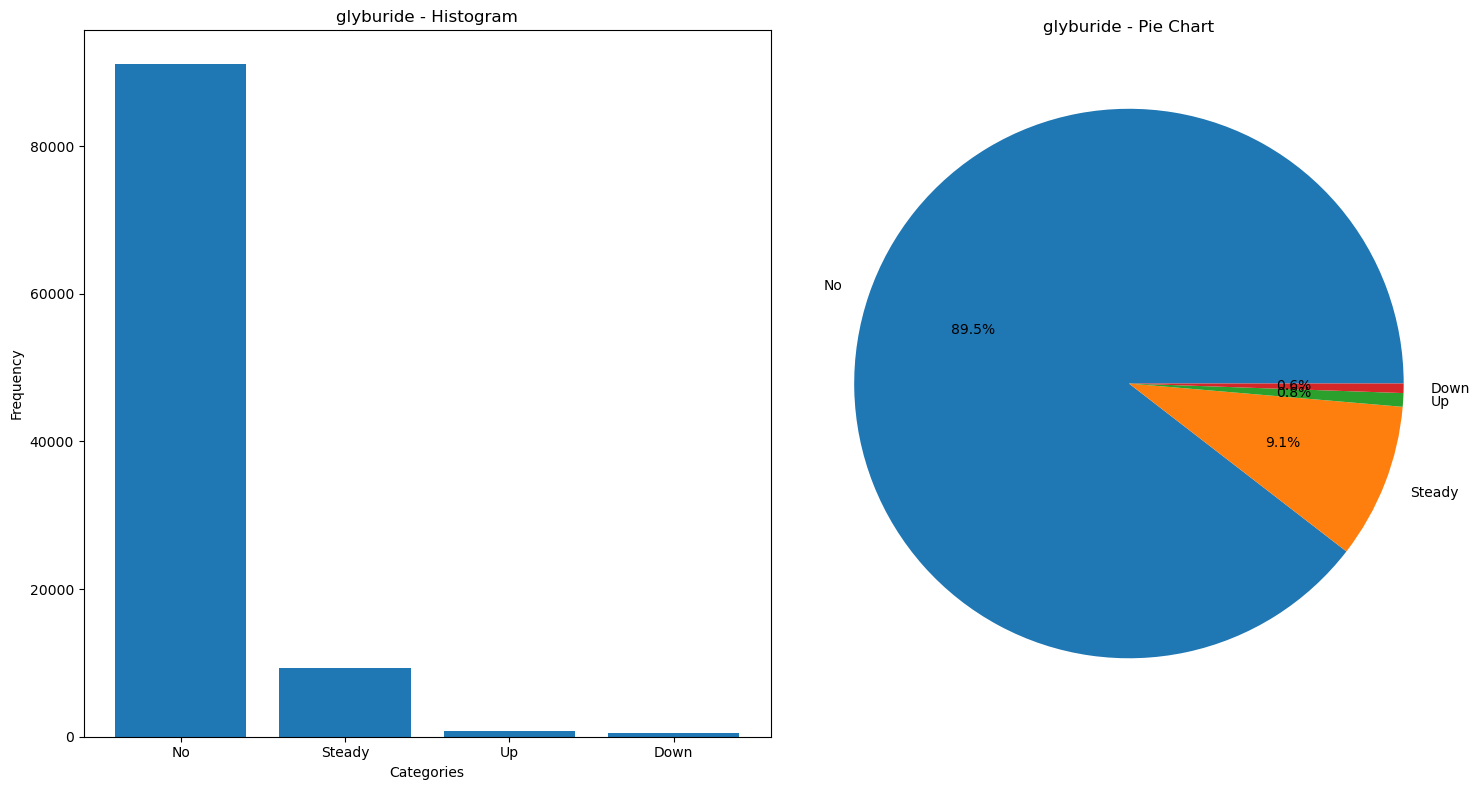

In [25]:
plot_histogram_pie('glyburide')

The "glyburide" column in the dataset represents the medication dosage change for the drug glyburide. 

The majority of patients, with 91,116 instances, have no change in the dosage ("No"). 

There are instances where the dosage is kept steady ("Steady") for 9,274 patients. Additionally, there are 812 instances where the dosage is increased ("Up") and 564 instances where the dosage is decreased ("Down").

Value Counts:
No        101743
Steady        23
Name: tolbutamide, dtype: int64


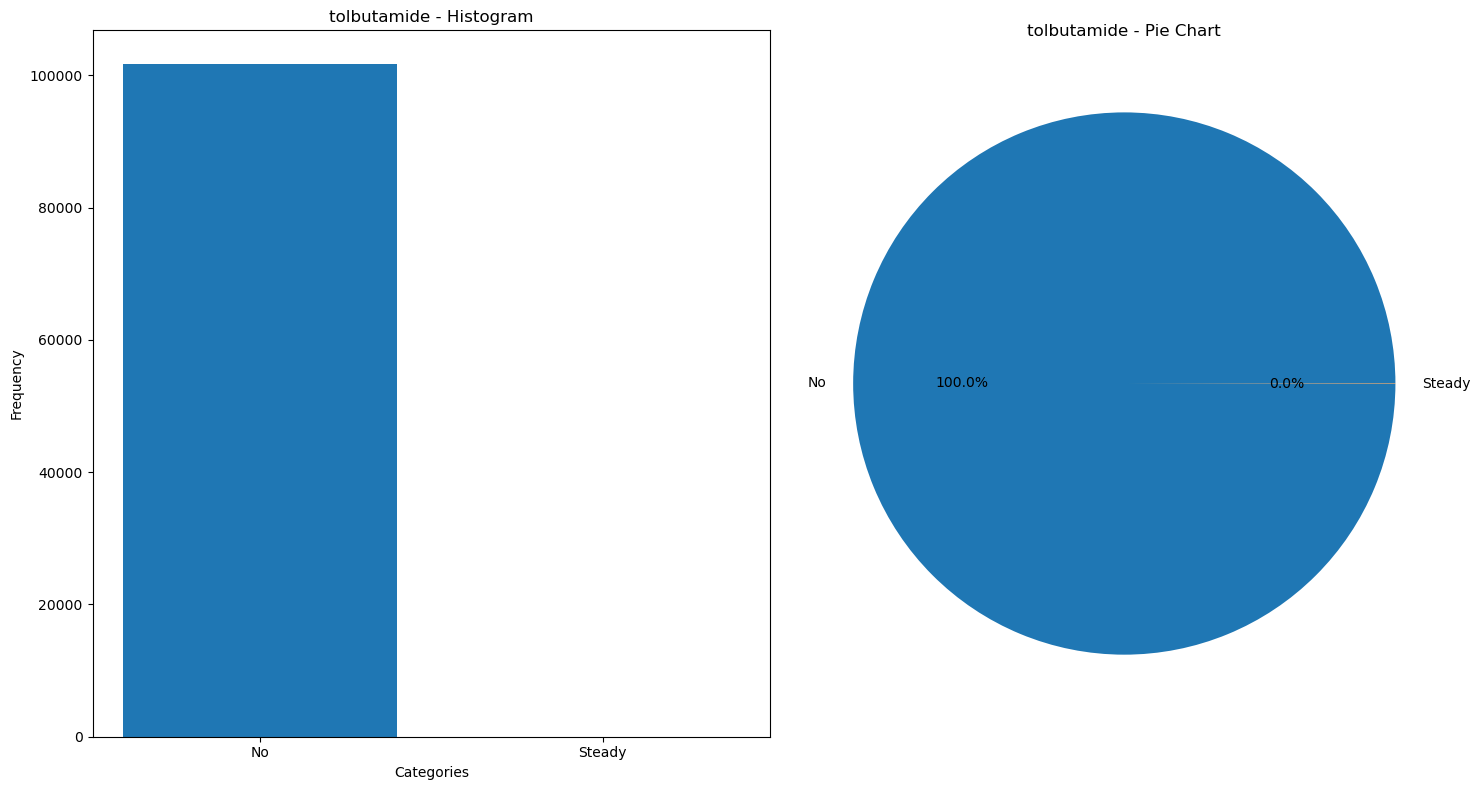

In [26]:
plot_histogram_pie('tolbutamide')

The "tolbutamide" column in the dataset represents the medication dosage change for the drug tolbutamide. 

The majority of patients, with 101,743 instances, have no change in the dosage ("No"). There are only 23 instances where the dosage is kept steady

Value Counts:
No        94438
Steady     6976
Up          234
Down        118
Name: pioglitazone, dtype: int64


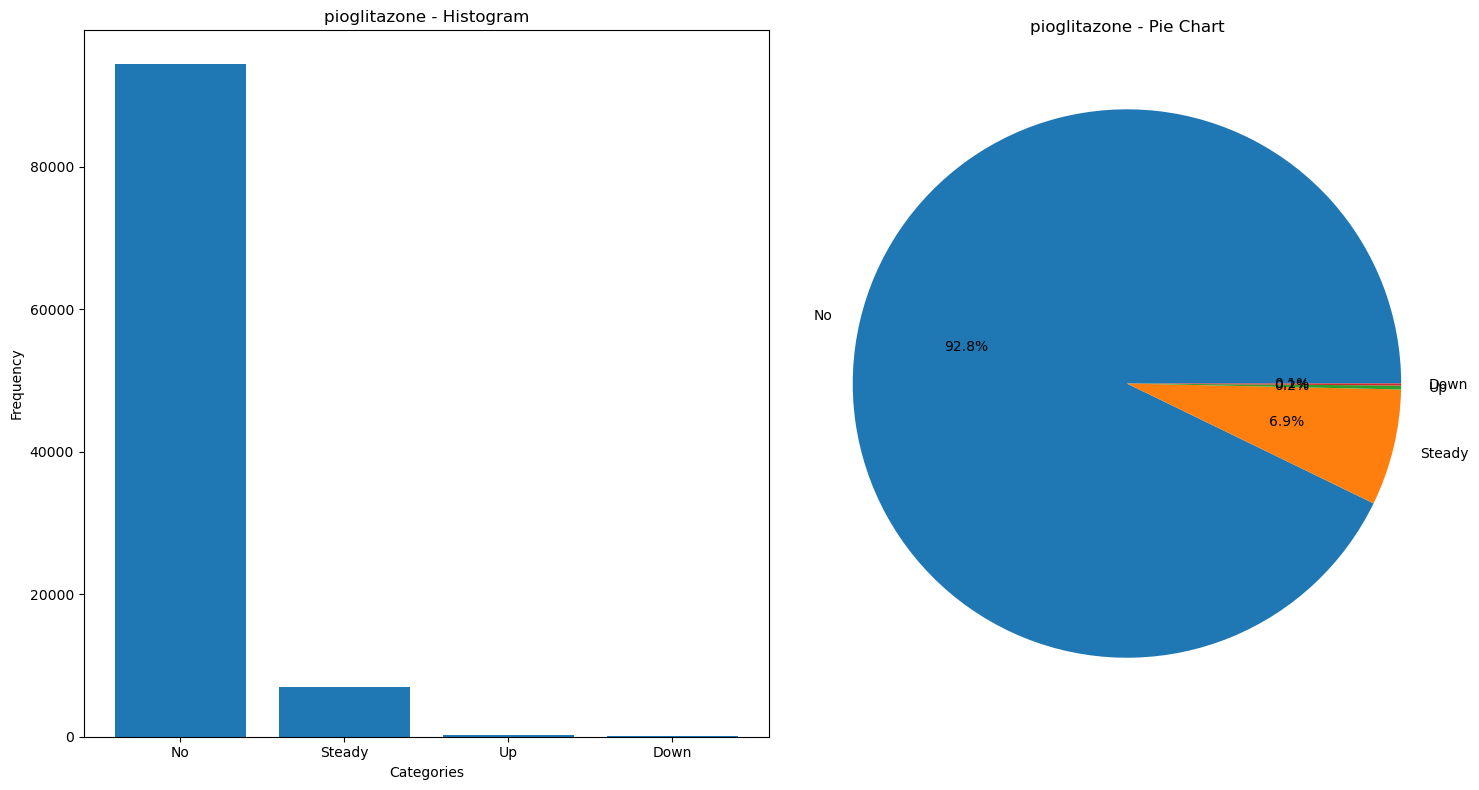

In [27]:
plot_histogram_pie('pioglitazone')

The "pioglitazone" column in the dataset represents the medication dosage change for the drug pioglitazone. 

The majority of patients, with 94,438 instances, have no change in the dosage ("No"). 

There are instances where the dosage is kept steady ("Steady") for 6,976 patients. Additionally, there are 234 instances where the dosage is increased ("Up") and 118 instances where the dosage is decreased ("Down").

Value Counts:
No        95401
Steady     6100
Up          178
Down         87
Name: rosiglitazone, dtype: int64


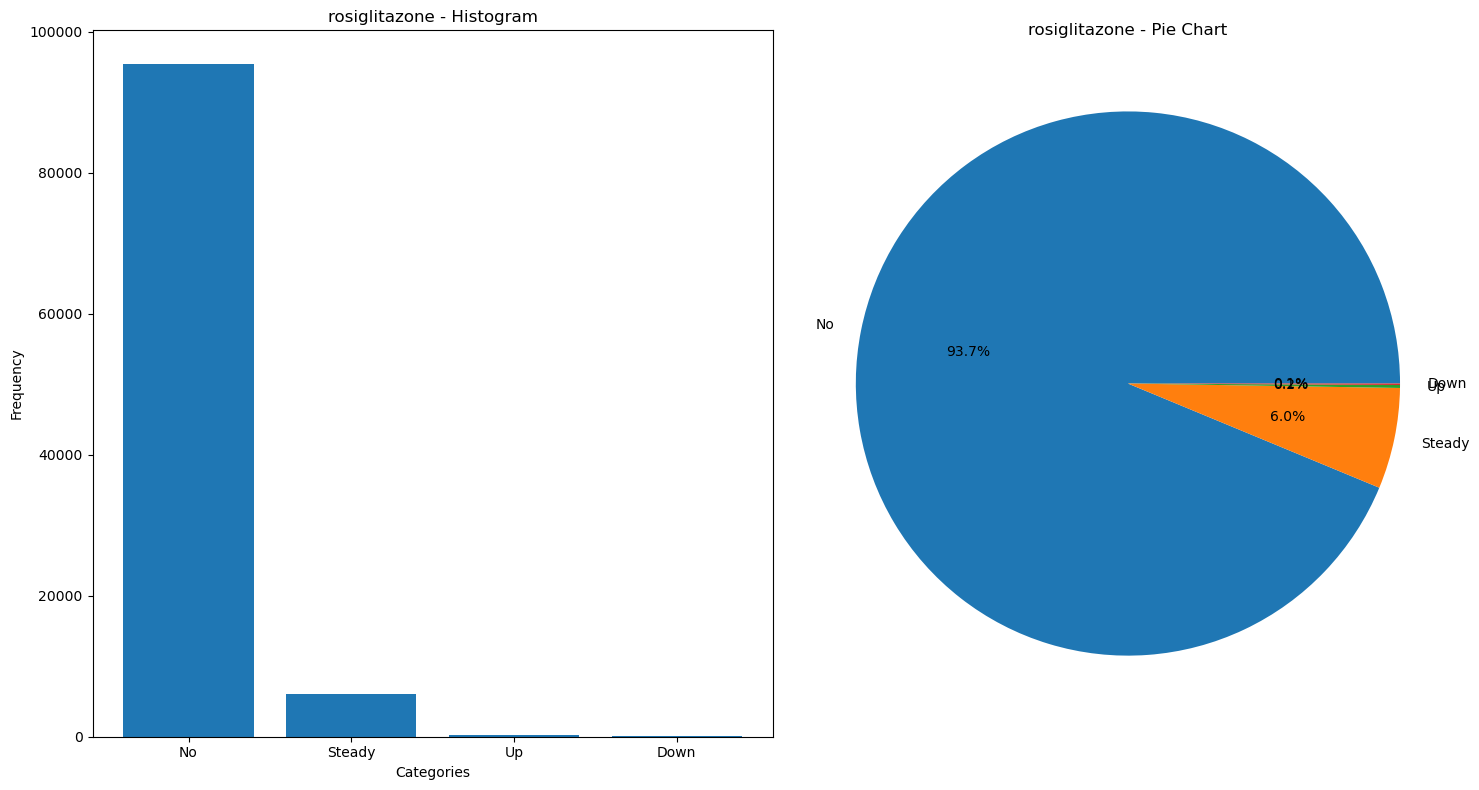

In [28]:
plot_histogram_pie('rosiglitazone')

The "rosiglitazone" column in the dataset represents the medication dosage change for the drug rosiglitazone. 

The majority of patients, with 95,401 instances, have no change in the dosage ("No"). 

There are instances where the dosage is kept steady ("Steady") for 6,100 patients. Additionally, there are 178 instances where the dosage is increased ("Up") and 87 instances where the dosage is decreased ("Down").

Value Counts:
No        101458
Steady       295
Up            10
Down           3
Name: acarbose, dtype: int64


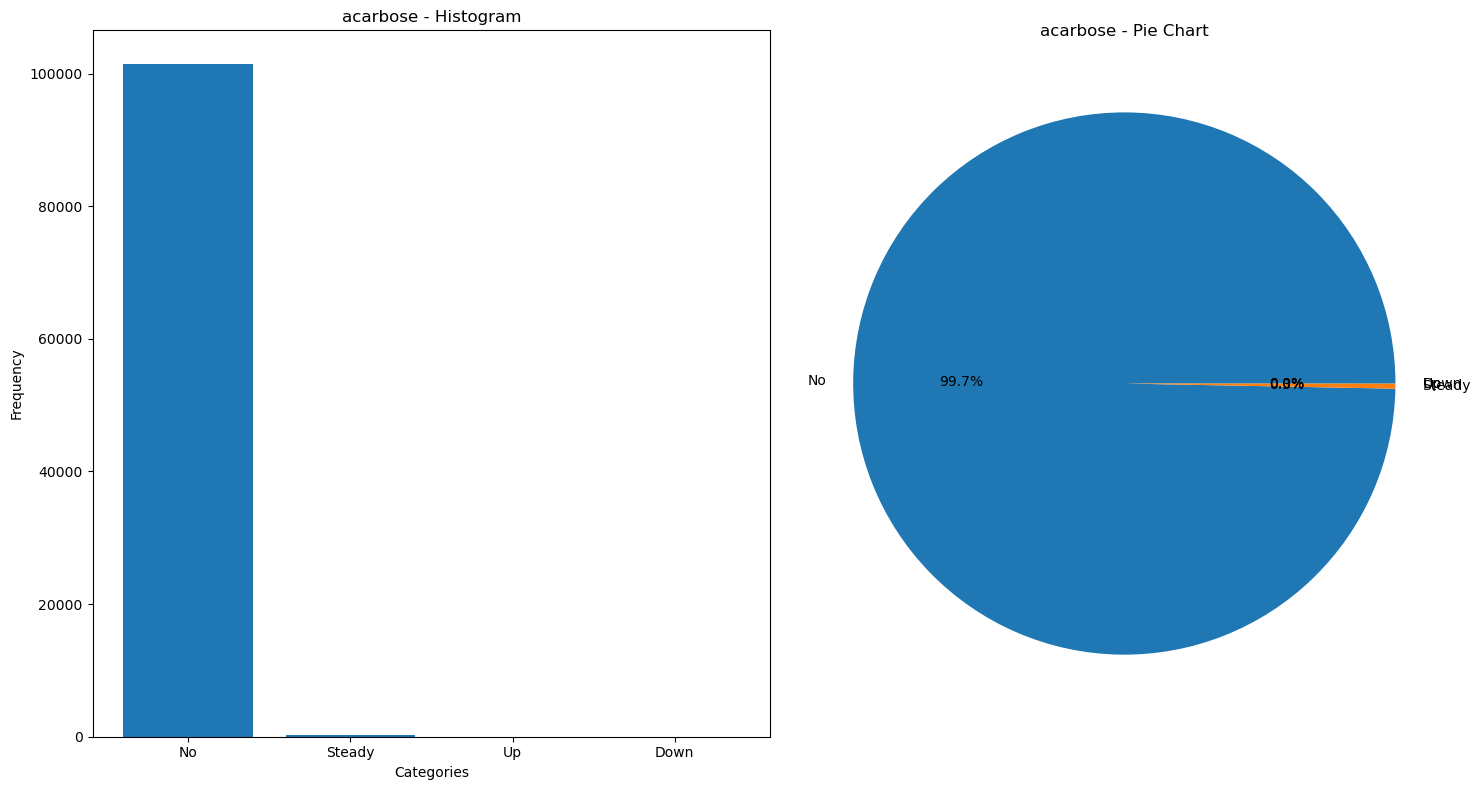

In [29]:
plot_histogram_pie('acarbose')

The "acarbose" column in the dataset represents the medication dosage change for the drug acarbose. 

The majority of patients, with 101,458 instances, have no change in the dosage ("No"). 

There are instances where the dosage is kept steady ("Steady") for 295 patients. Additionally, there are 10 instances where the dosage is increased ("Up") and 3 instances where the dosage is decreased ("Down"). 

Value Counts:
No        101728
Steady        31
Down           5
Up             2
Name: miglitol, dtype: int64


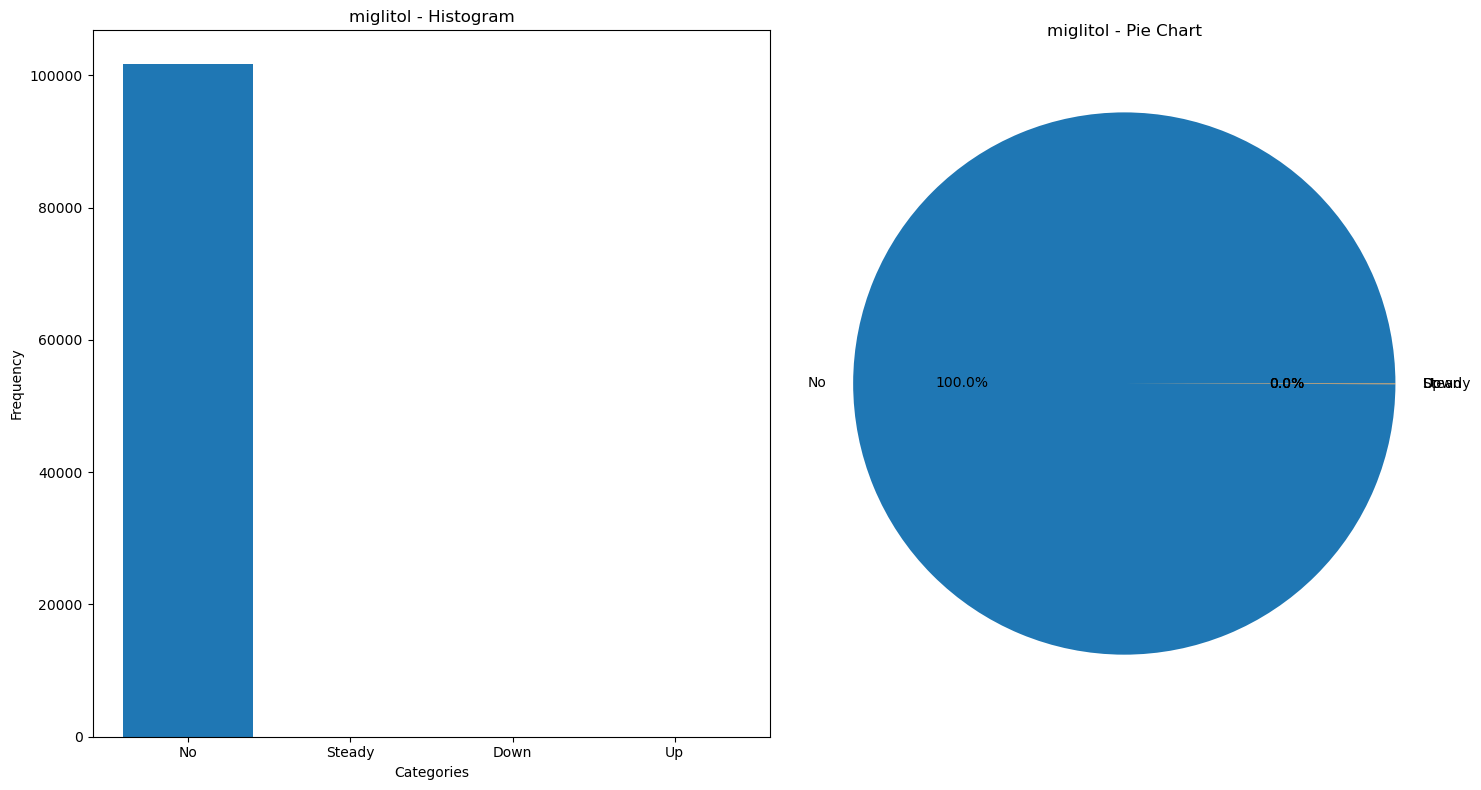

In [30]:
plot_histogram_pie('miglitol')

The "miglitol" column in the dataset represents the medication dosage change for the drug miglitol. 

The majority of patients, with 101,728 instances, have no change in the dosage ("No"). 

There are instances where the dosage is kept steady ("Steady") for 31 patients. Additionally, there are 5 instances where the dosage is decreased ("Down") and 2 instances where the dosage is increased ("Up"). 

Value Counts:
No        101763
Steady         3
Name: troglitazone, dtype: int64


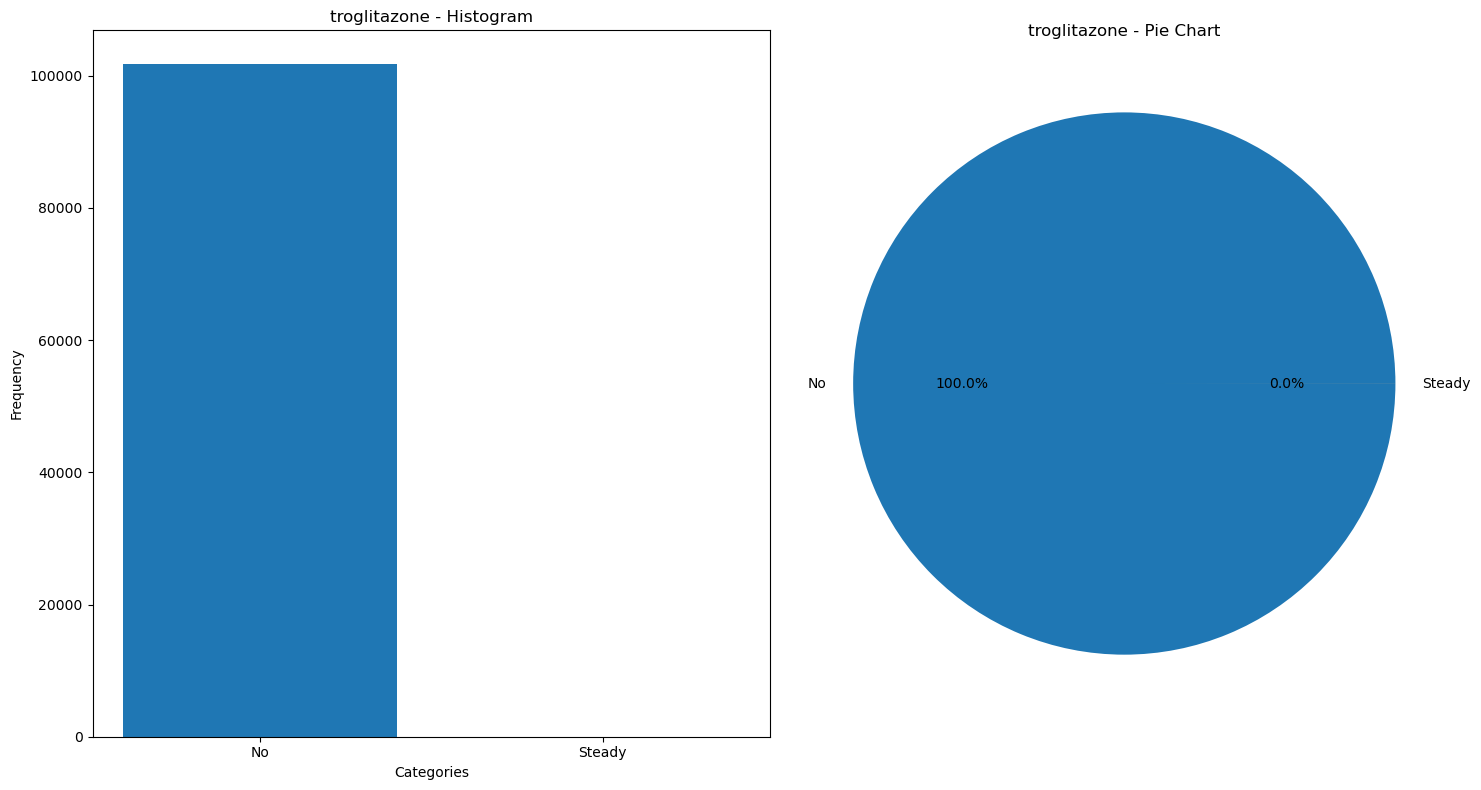

In [31]:
plot_histogram_pie('troglitazone')

The "troglitazone" column in the dataset represents the medication dosage change for the drug troglitazone. 

The majority of patients, with 101,763 instances, have no change in the dosage ("No"). There are only 3 instances where the dosage is kept steady. 

Troglitazone is a medication used to treat type 2 diabetes, but it has been withdrawn from the market due to safety concerns. Hence, it is expected to have a very low frequency of usage in the dataset.

Value Counts:
No        101727
Steady        38
Up             1
Name: tolazamide, dtype: int64


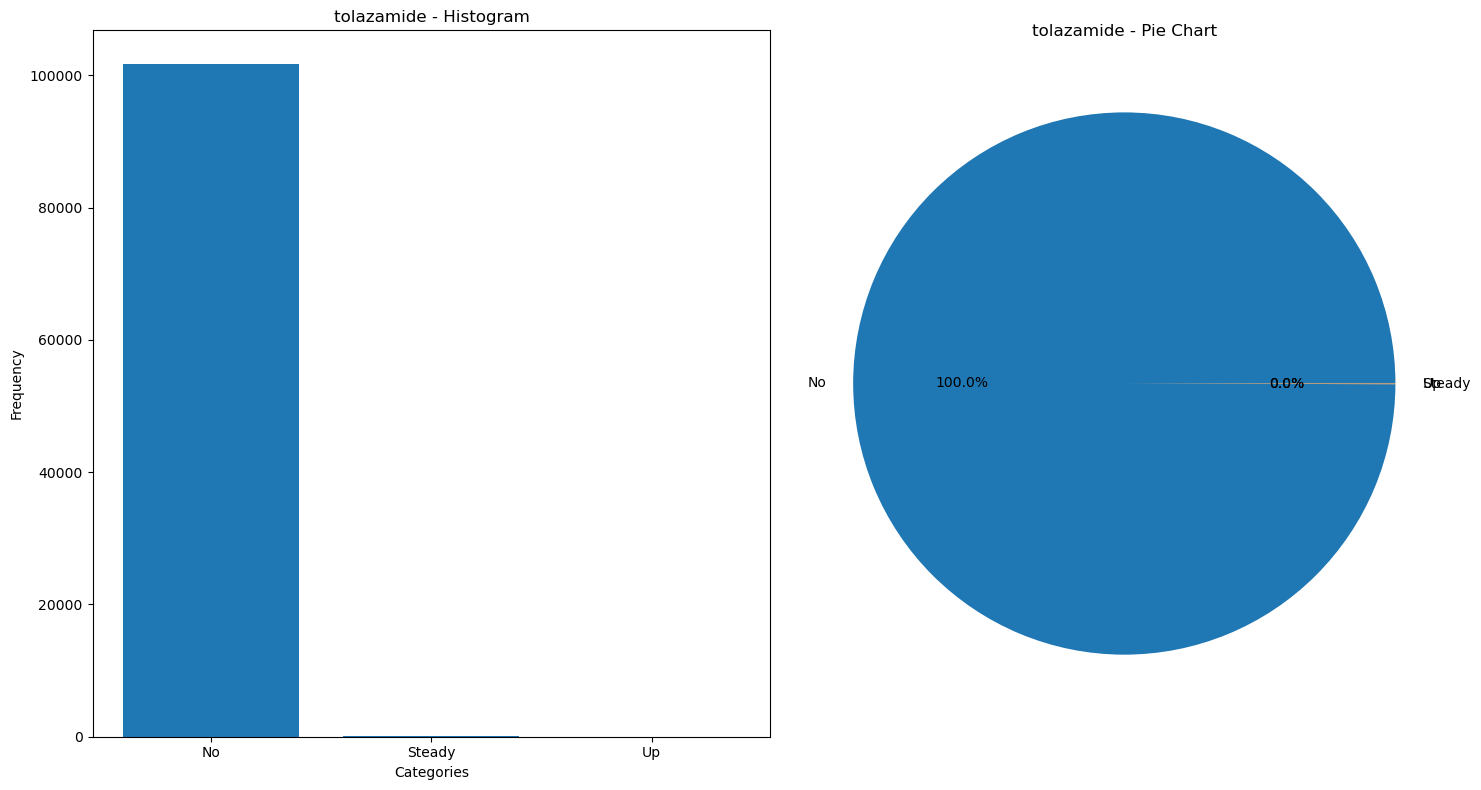

In [32]:
plot_histogram_pie('tolazamide')

The "tolazamide" column in the dataset represents the medication dosage change for the drug tolazamide. 

The majority of patients, with 101,727 instances, have no change in the dosage ("No"). 

There are instances where the dosage is kept steady ("Steady") for 38 patients. Additionally, there is only one instance where the dosage is increased ("Up"). 

Tolazamide is an oral antidiabetic medication used to control blood sugar levels in patients with type 2 diabetes.

Value Counts:
No    101766
Name: examide, dtype: int64


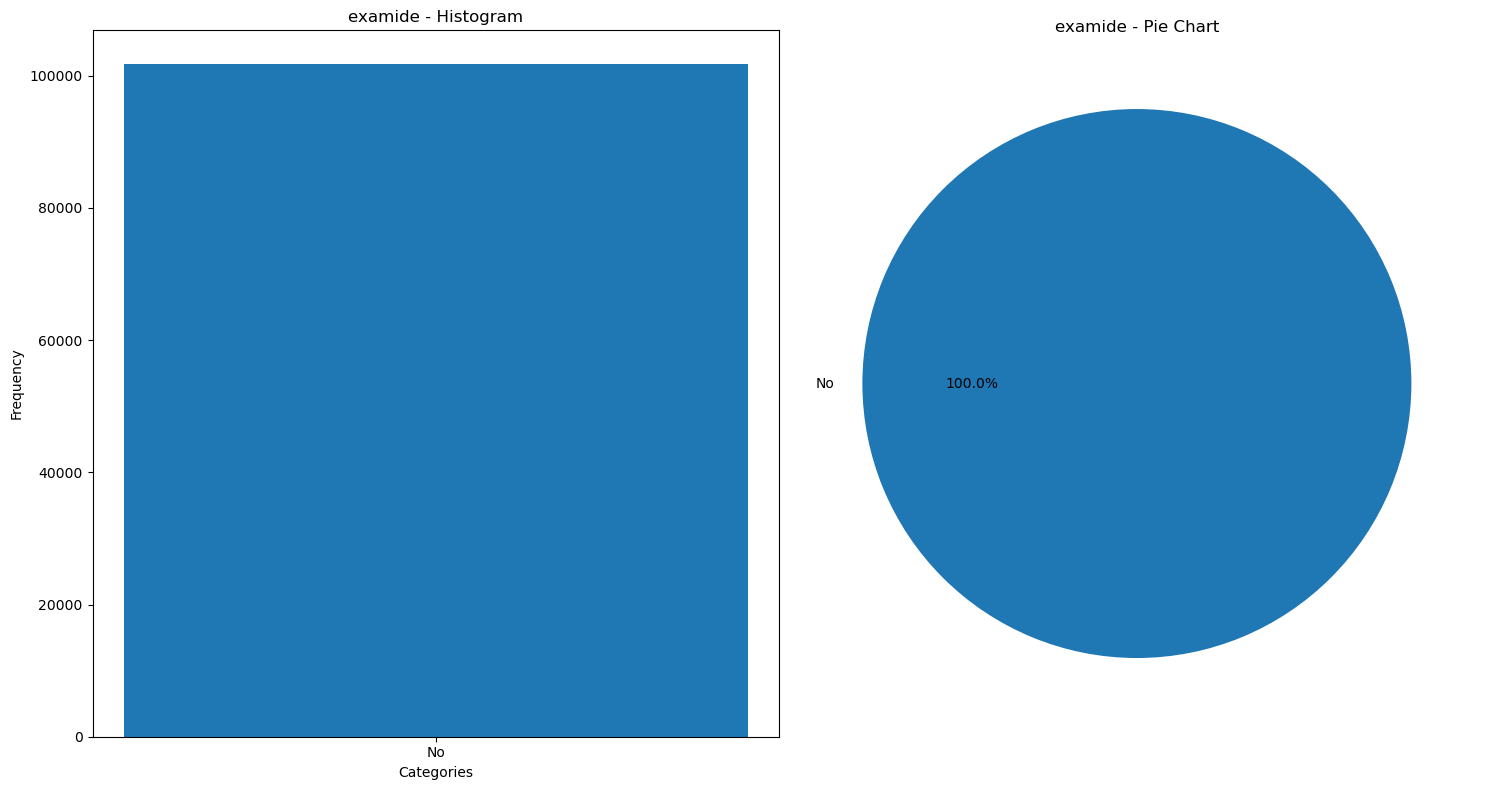

In [33]:
plot_histogram_pie('examide')

In the "examide" column of the dataset, there is only one unique value, which is "No". 

This means that all instances in the dataset have the value "No" for the "examide" feature. 

Therefore, this feature does not provide any useful information for analysis as it has no variability and does not contribute to distinguishing different instances in the dataset.

Value Counts:
No        47383
Steady    30849
Down      12218
Up        11316
Name: insulin, dtype: int64


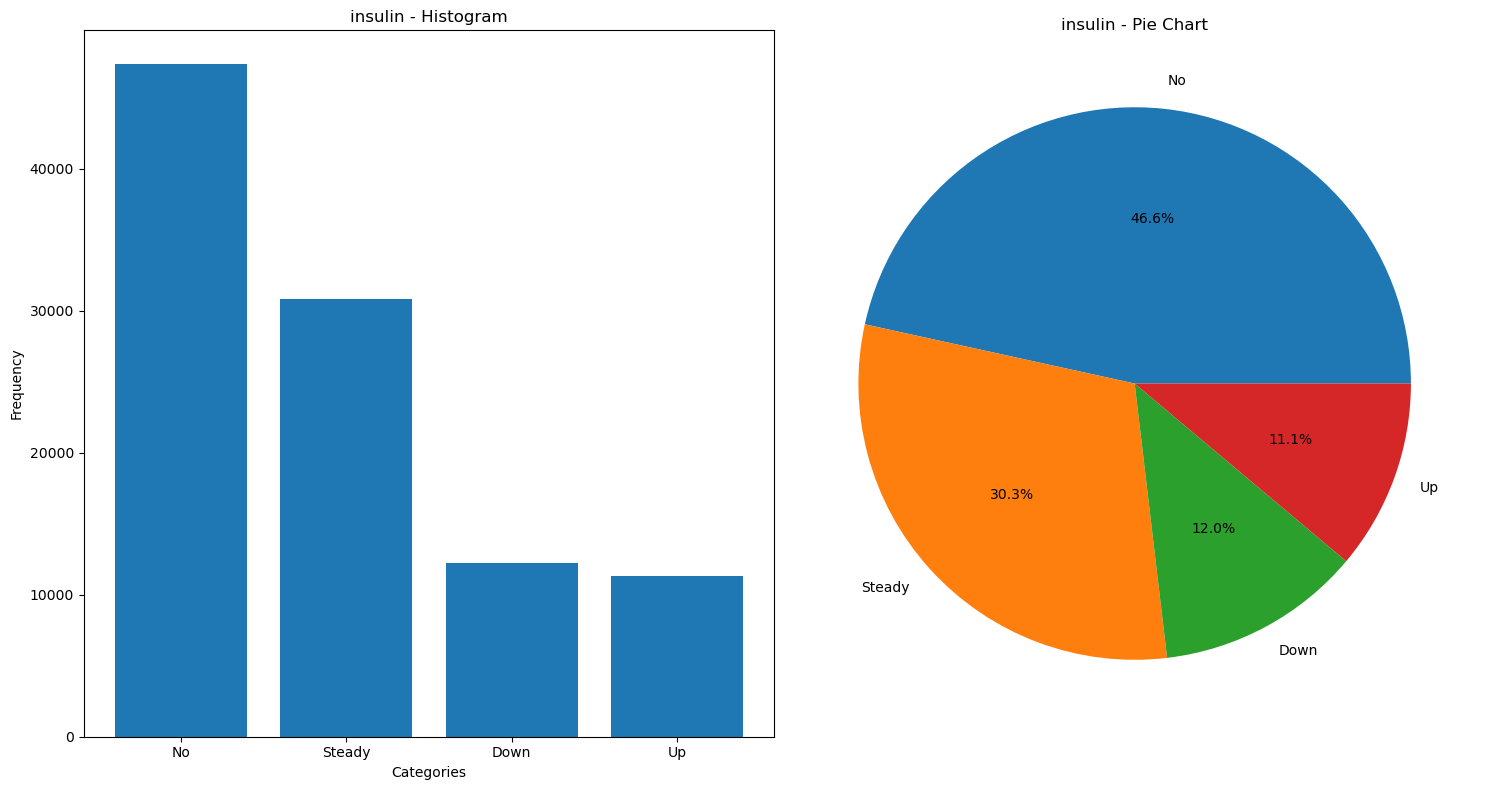

In [34]:
plot_histogram_pie('insulin')

The "insulin" column in the dataset represents the usage of insulin medication. 

Among the instances, 47,383 patients (approximately 46.6%) did not take insulin ("No"), while 30,849 patients (approximately 30.3%) took insulin in a steady dosage ("Steady"). 

Additionally, there were 12,218 instances (approximately 12%) where the dosage of insulin was decreased ("Down"), and 11,316 instances (approximately 11.1%) where the dosage was increased ("Up"). 

Insulin is a hormone used to regulate blood sugar levels in patients with diabetes, and the varying dosages reflect the individual needs of the patients in managing their condition.

Value Counts:
No        101060
Steady       692
Up             8
Down           6
Name: glyburide-metformin, dtype: int64


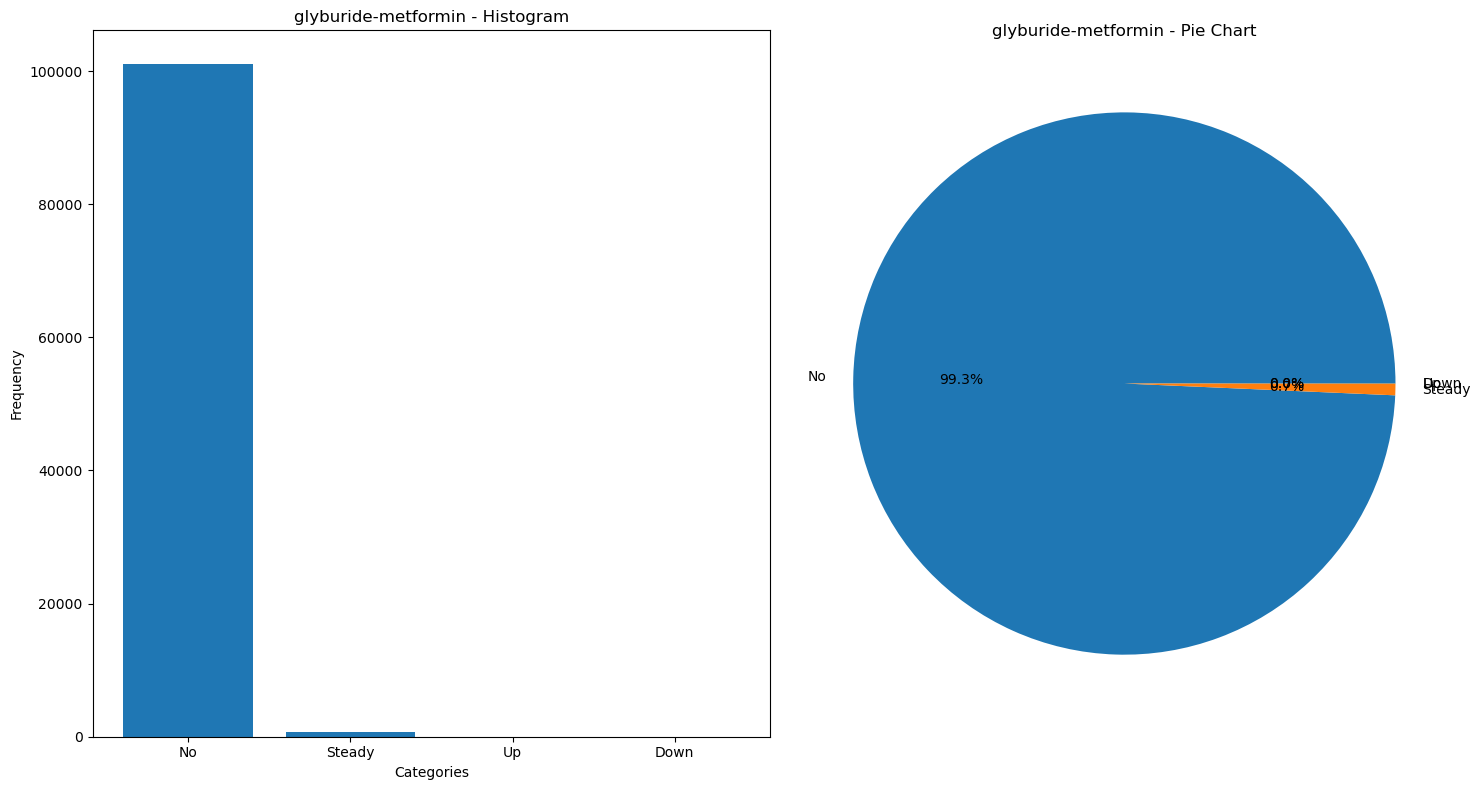

In [35]:
plot_histogram_pie('glyburide-metformin')

The "glyburide-metformin" column in the dataset represents the combination of the medications glyburide and metformin. 

Among the instances, 101,060 patients did not take the combination medication ("No"), while 692 patients took the combination medication in a steady dosage ("Steady"). Additionally, there were 8 instances where the dosage of the combination medication was increased ("Up"), and 6 instances where the dosage was decreased ("Down").

Value Counts:
No        101753
Steady        13
Name: glipizide-metformin, dtype: int64


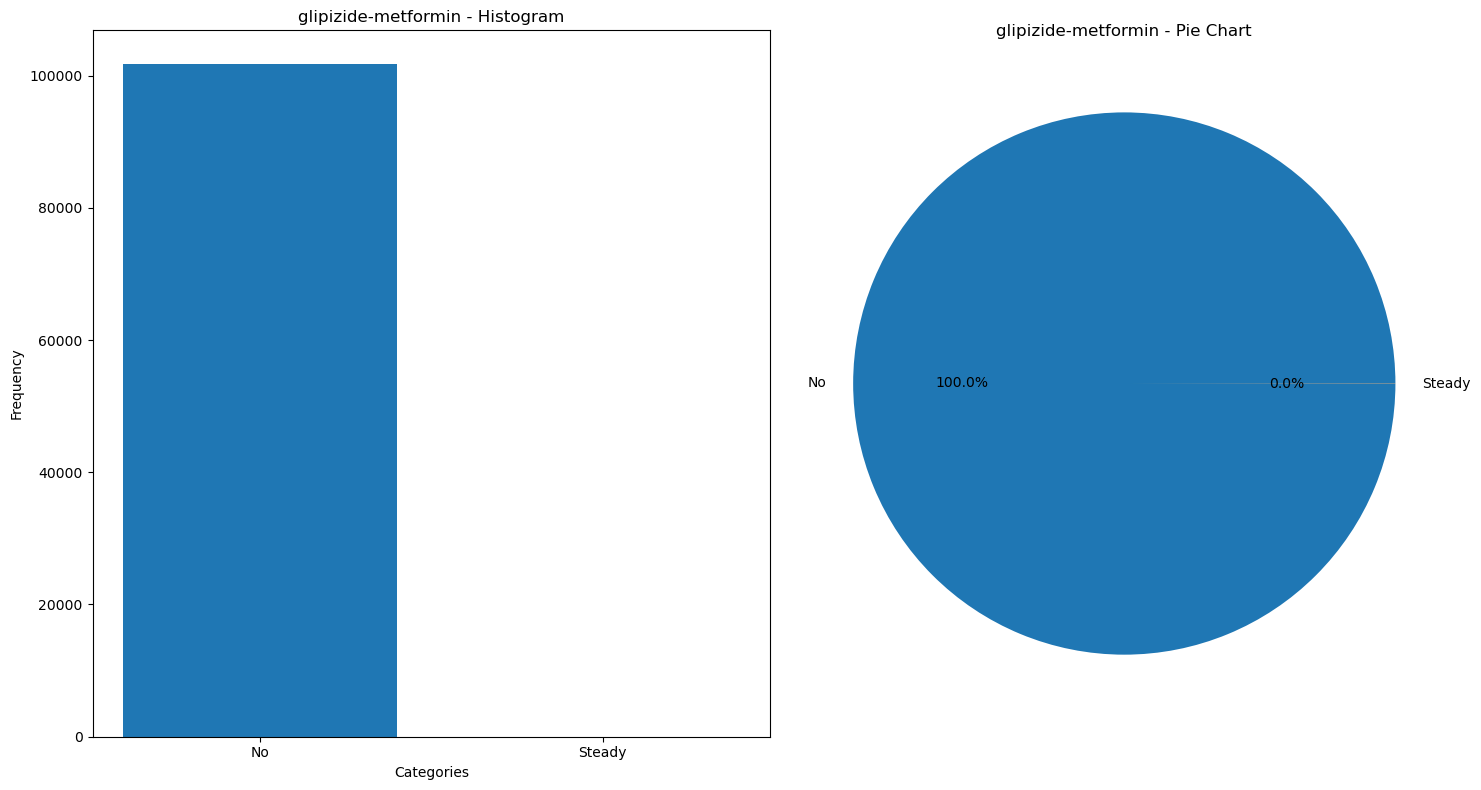

In [36]:
plot_histogram_pie('glipizide-metformin')

The "glipizide-metformin" column in the dataset represents the combination of the medications glipizide and metformin. 

Among the instances, 101,753 patients did not take the combination medication ("No"), while 13 patients took the combination medication in a steady dosage ("Steady").

Value Counts:
No        101765
Steady         1
Name: glimepiride-pioglitazone, dtype: int64


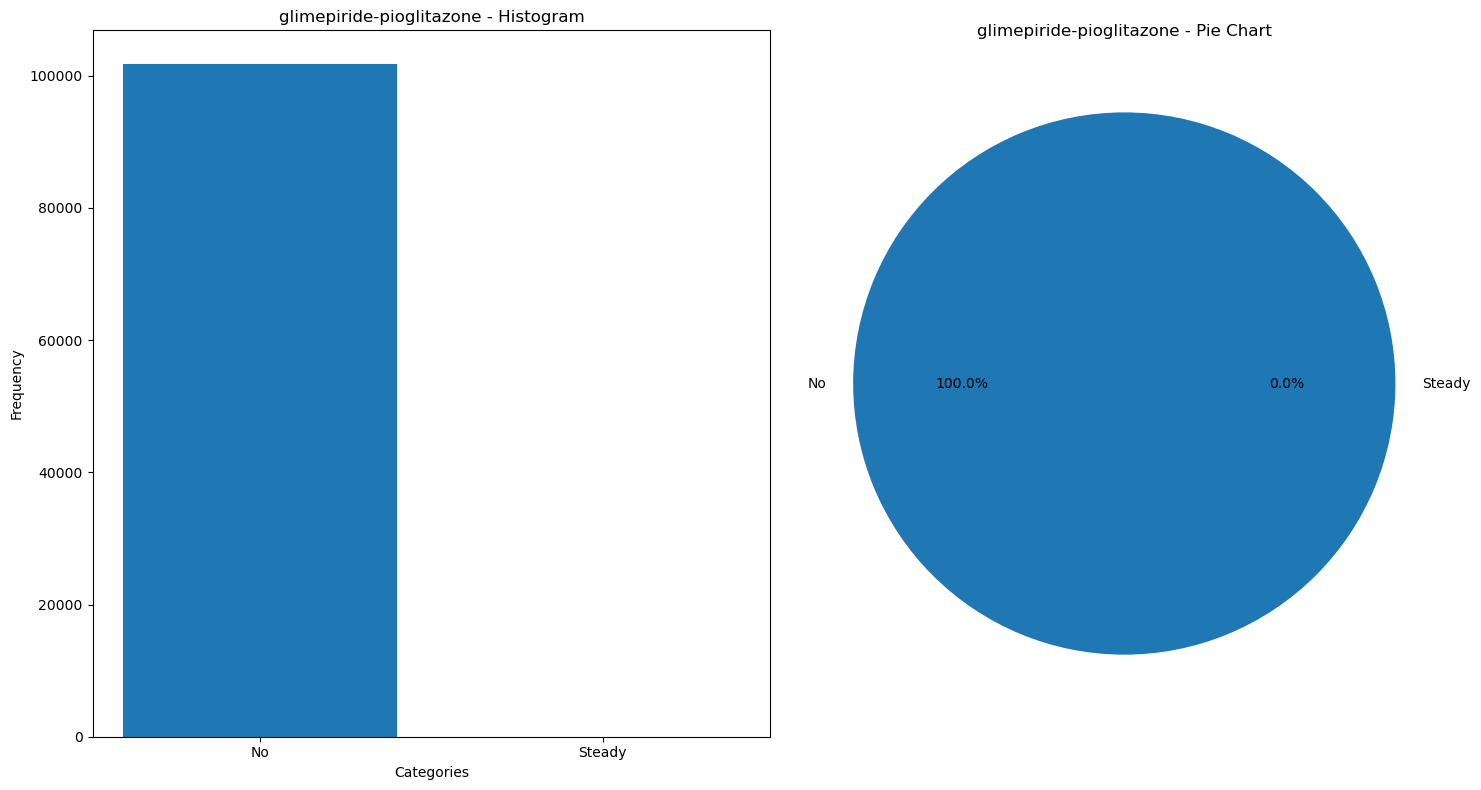

In [37]:
plot_histogram_pie('glimepiride-pioglitazone')

The "glimepiride-pioglitazone" column in the dataset represents the combination of the medications glimepiride and pioglitazone. 

Among the instances, 101,765 patients did not take the combination medication ("No"), while only one patient took the combination medication in a steady dosage ("Steady"). 

Value Counts:
No        101764
Steady         2
Name: metformin-rosiglitazone, dtype: int64


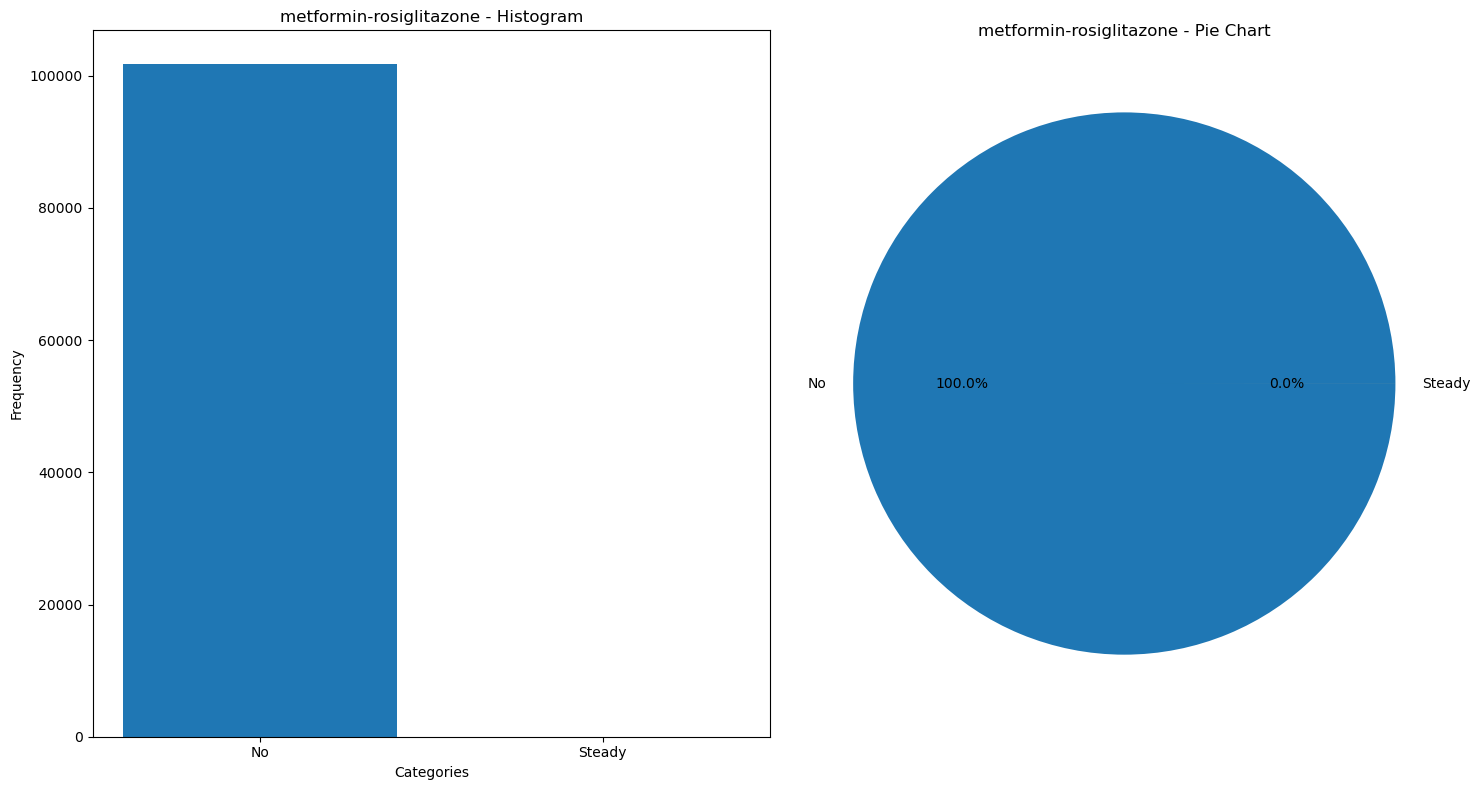

In [38]:
plot_histogram_pie('metformin-rosiglitazone')

The "metformin-rosiglitazone" column in the dataset represents the combination of the medications metformin and rosiglitazone. 

Among the instances, 101,764 patients did not take the combination medication ("No"), while two patients took the combination medication in a steady dosage ("Steady").

Value Counts:
No        101765
Steady         1
Name: metformin-pioglitazone, dtype: int64


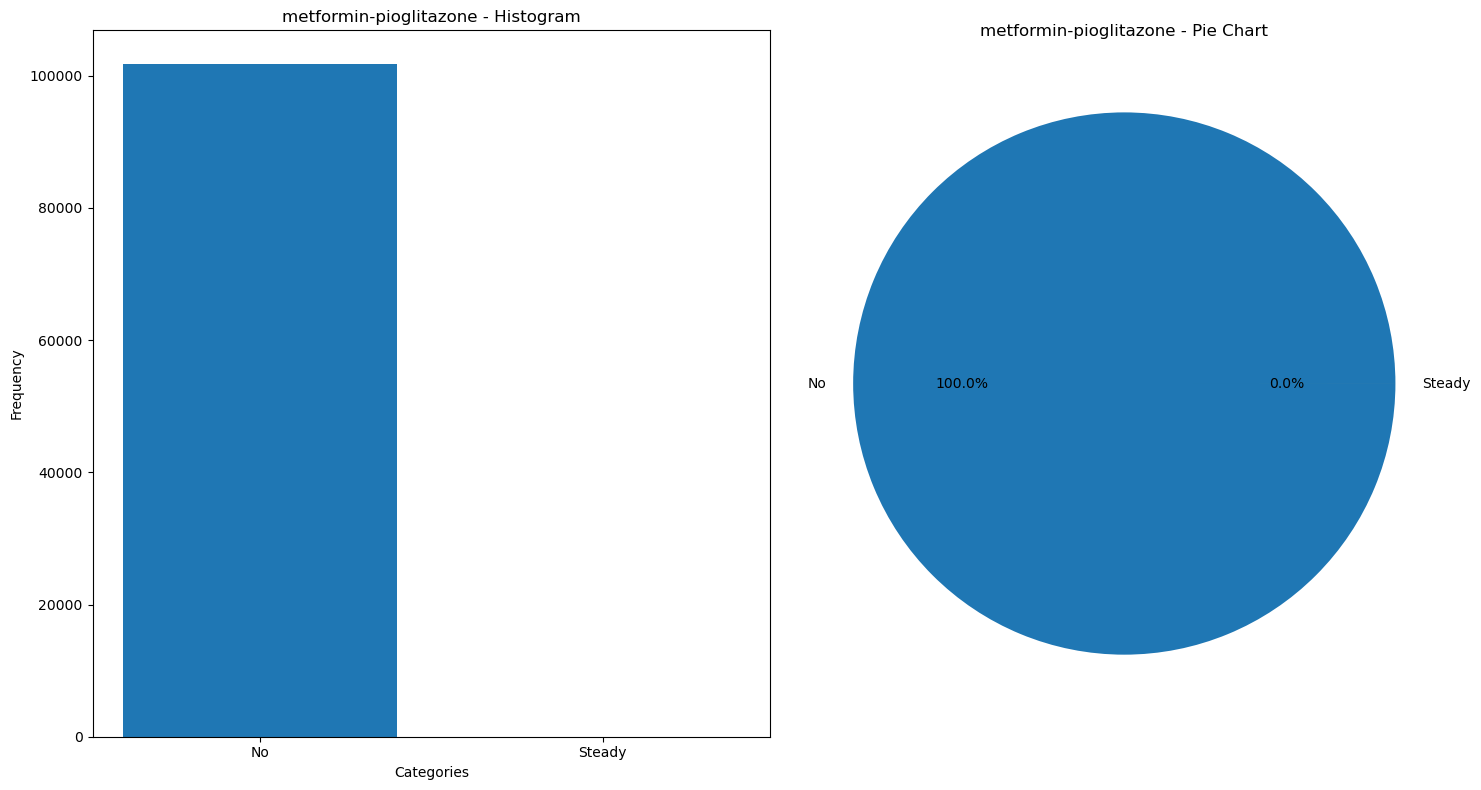

In [39]:
plot_histogram_pie('metformin-pioglitazone')

The "metformin-pioglitazone" column in the dataset represents the combination of the medications metformin and pioglitazone. 

Among the instances, 101,765 patients did not take the combination medication ("No"), while only one patient took the combination medication in a steady dosage ("Steady"). 

Value Counts:
No    54755
Ch    47011
Name: change, dtype: int64


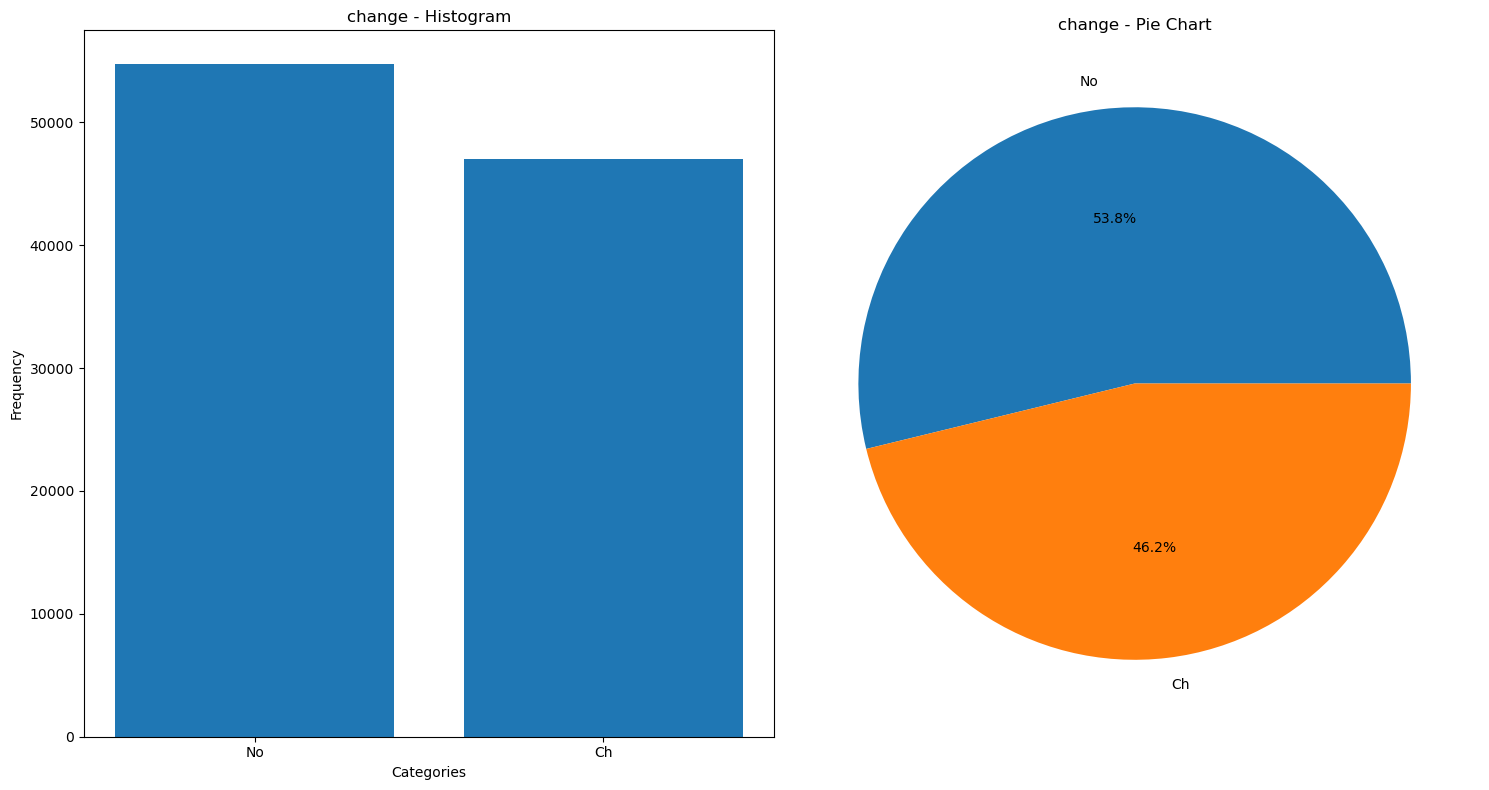

In [40]:
plot_histogram_pie('change')

The "change" column in the dataset represents whether there was a change in diabetes medication. 

Among the instances, 54,755 patients (approximately 53.6%) did not have a change in medication ("No"), while 47,011 patients (approximately 46.4%) had a change in medication ("Ch").

Value Counts:
Yes    78363
No     23403
Name: diabetesMed, dtype: int64


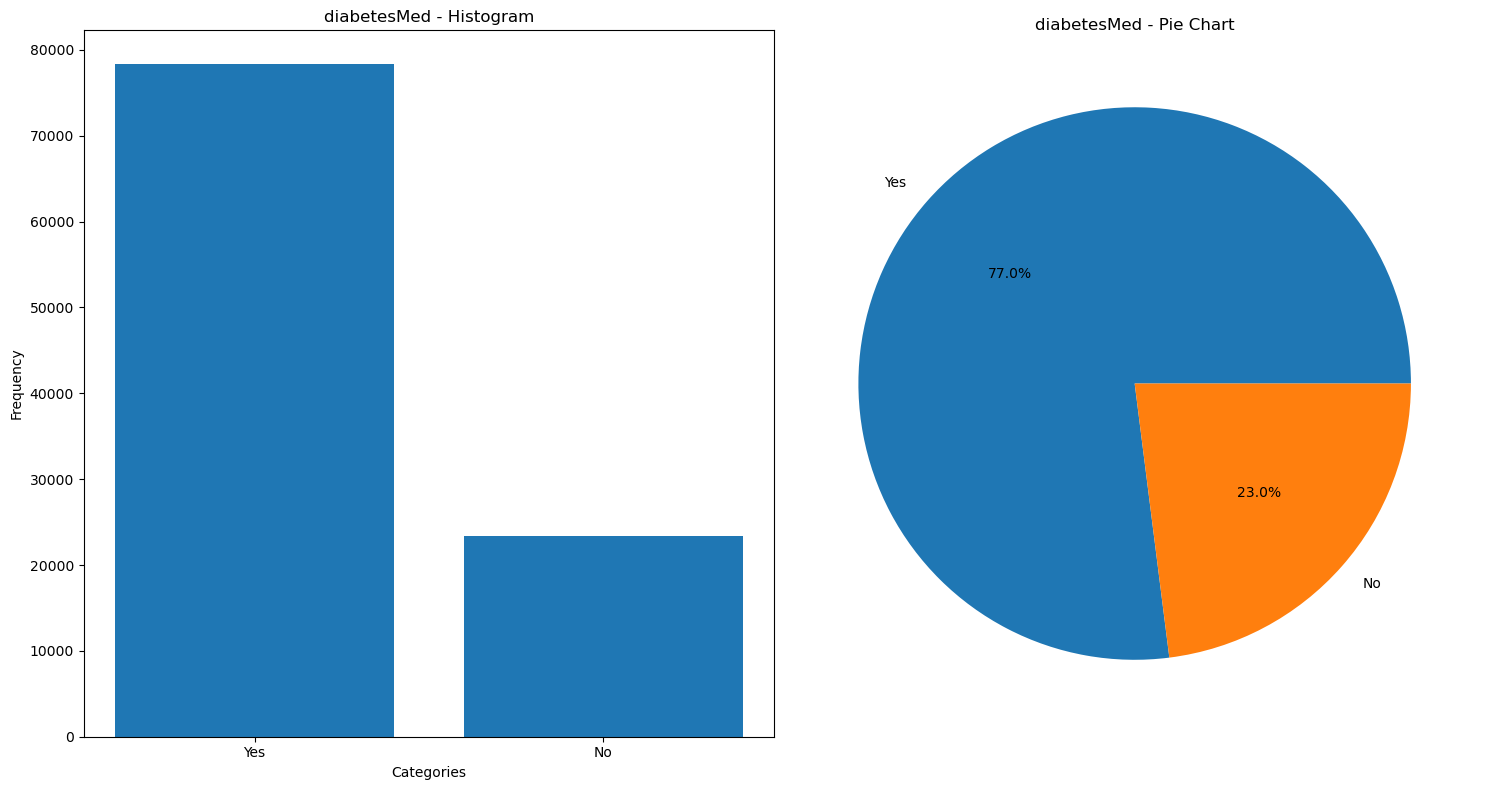

In [41]:
plot_histogram_pie('diabetesMed')

The "diabetesMed" column in the dataset indicates whether the patient was prescribed diabetes medication. 

Among the instances, 78,363 patients (approximately 77%) were prescribed diabetes medication ("Yes"), while 23,403 patients (approximately 23%) were not prescribed diabetes medication ("No").

### 2. **Continuous Variable**

The second type of variable that will be explored is continuous variable.

**Descriptive Statistics**

This section will show descriptive statistics of numerical variables.


In [42]:
data.select_dtypes(exclude='object').describe()

encounter_id   patient_nbr  admission_type_id  \
count  1.017660e+05  1.017660e+05      101766.000000   
mean   1.652016e+08  5.433040e+07           2.024006   
std    1.026403e+08  3.869636e+07           1.445403   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.496119e+07  2.341322e+07           1.000000   
50%    1.523890e+08  4.550514e+07           1.000000   
75%    2.302709e+08  8.754595e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000             7.000000          4.000000   
75%                    4.000000             7.000000          6.000000   
max                   28.000000            25.000000         14.000000   

       num_lab_procedures  num_procedures  num_medications  number_outpatient  \
count       101766.000000   101766.000000    101766.000000      101766.000000   
mean            43.095641        1.339730        16.021844           0.369357   
std             19.674362        1.705807         8.127566           1.267265   
min              1.000000        0.000000         1.000000           0.000000   
25%             31.000000        0.000000        10.000000           0.000000   
50%             44.000000        1.000000        15.000000           0.000000   
75%             57.000000        2.000000        20.000000           0.000000   
max            132.000000        6.000000        81.000000          42.000000   

       number_emergency  number_inpatient  number_diagnoses  
count     101766.000000     101766.000000     101766.000000  
mean           0.197836          0.635566          7.422607  
std            0.930472          1.262863          1.933600  
min            0.000000          0.000000          1.000000  
25%            0.000000          0.000000          6.000000  
50%            0.000000          0.000000          8.000000  
75%            0.000000          1.000000          9.000000  
max           76.000000         21.000000         16.000000

**Continuous Column Distribution**

This section will show the continuous column distribution using histograms and box plots

In [43]:
def plot_histogram_boxplot_kde(data, column):

    # Create a figure with three subplots
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Plot histogram with KDE
    sns.histplot(data=data, x=column, kde=True, ax=axes[0])
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Histogram with KDE of ' + column)

    # Plot box plot
    sns.boxplot(data=data, x=column, ax=axes[1])
    axes[1].set_xlabel(column)
    axes[1].set_ylabel(column)
    axes[1].set_title('Box Plot of ' + column)

    plt.tight_layout()
    plt.show()


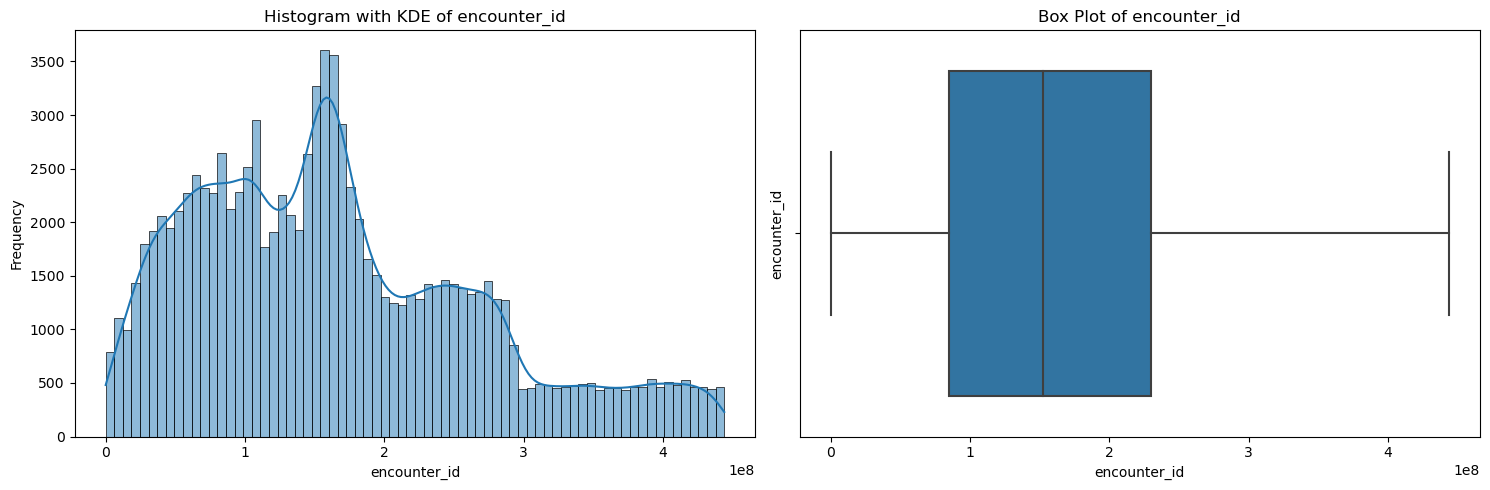

In [44]:
plot_histogram_boxplot_kde(data, 'encounter_id')

the column 'encounter_id' is normal (no outliers detected in these columns)

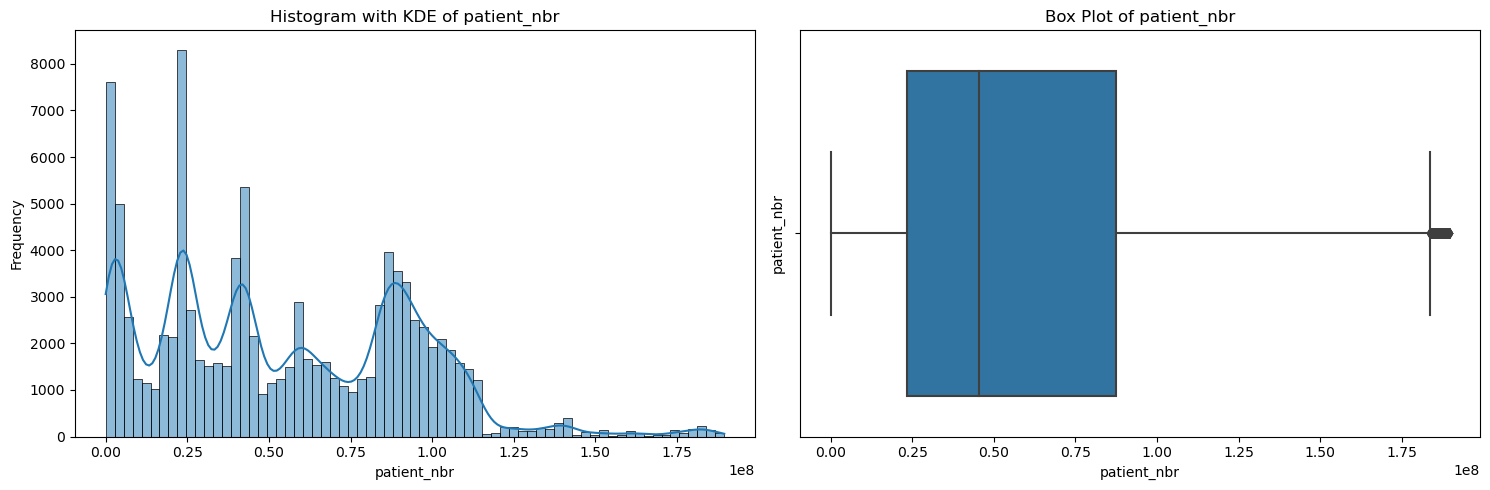

In [45]:
plot_histogram_boxplot_kde(data, 'patient_nbr')

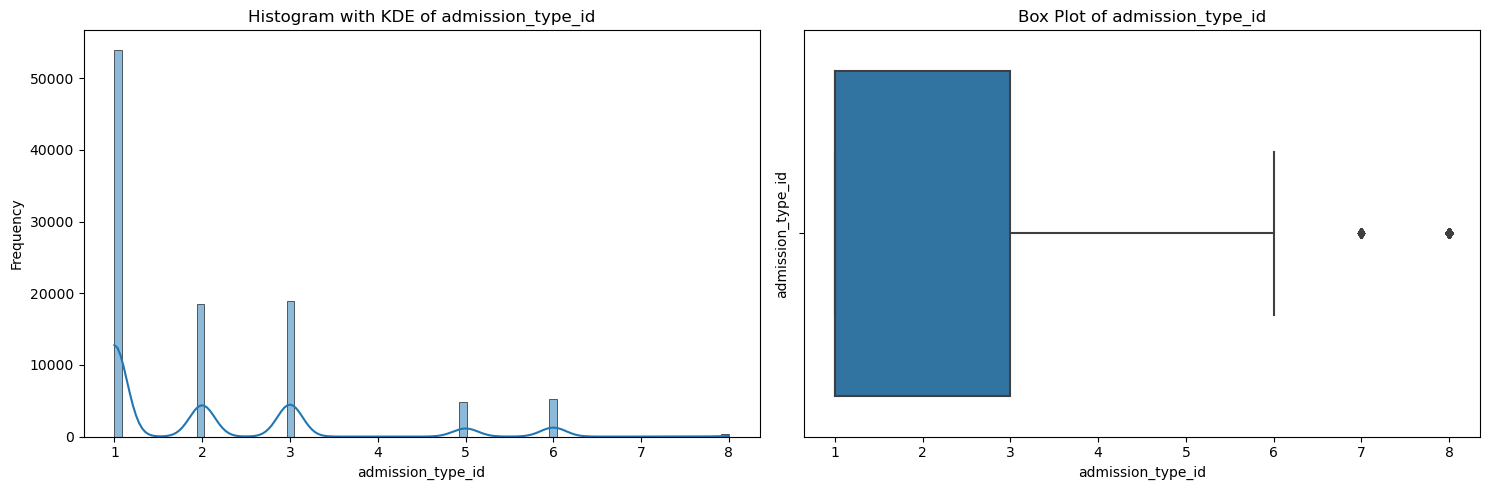

In [46]:
plot_histogram_boxplot_kde(data, 'admission_type_id')

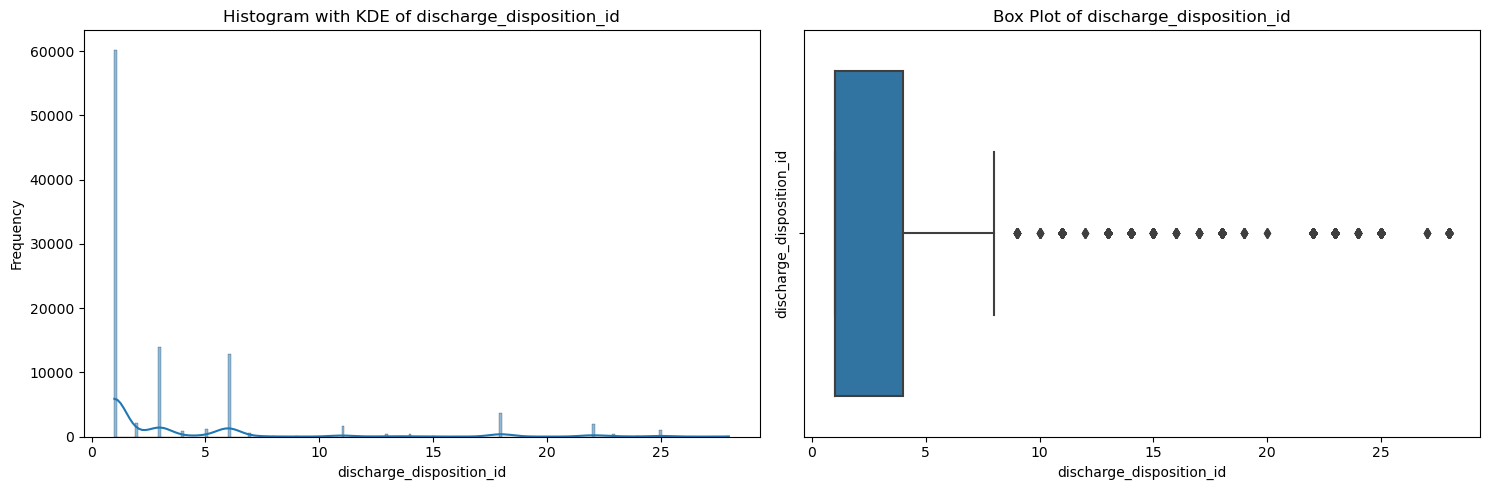

In [47]:
plot_histogram_boxplot_kde(data,'discharge_disposition_id')

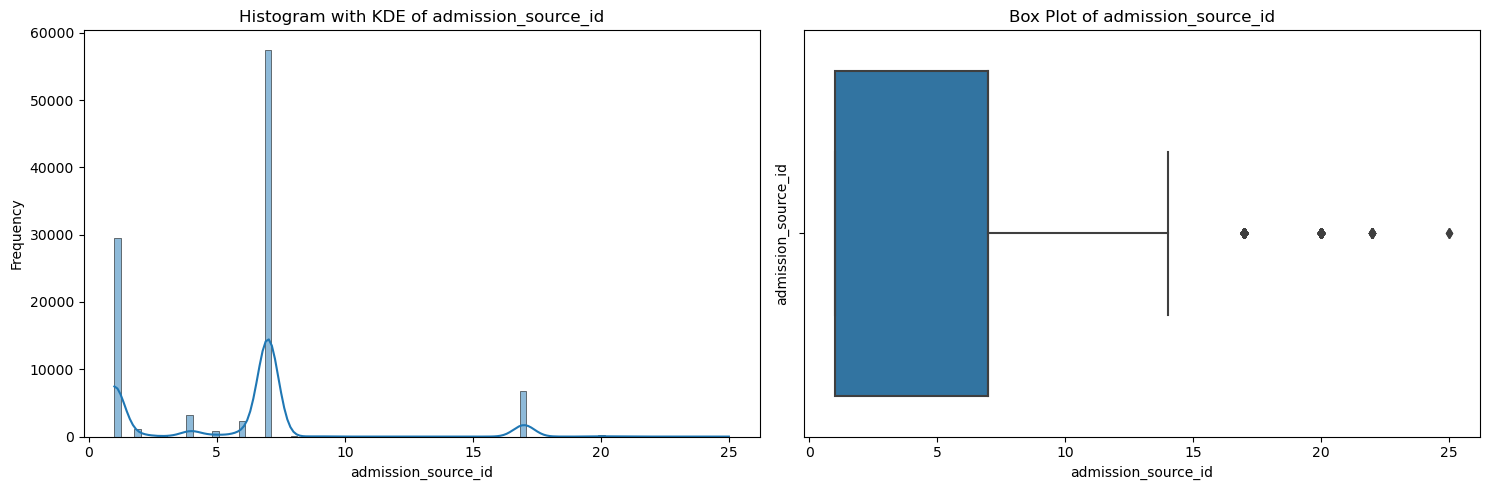

In [48]:
plot_histogram_boxplot_kde(data,'admission_source_id')

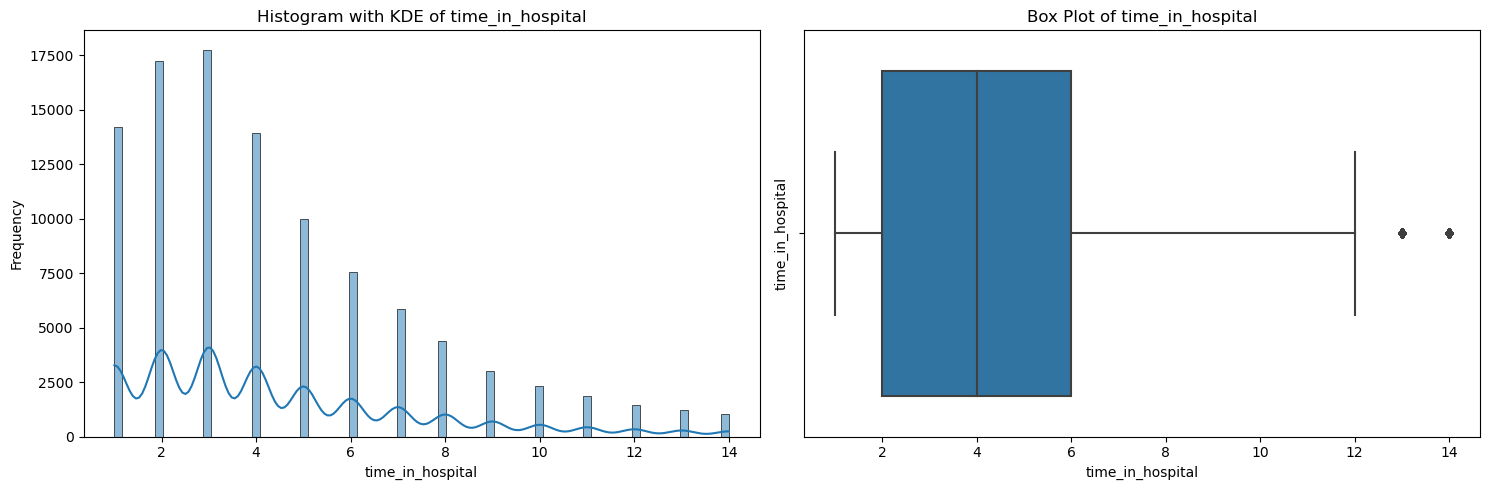

In [49]:
plot_histogram_boxplot_kde(data,'time_in_hospital')

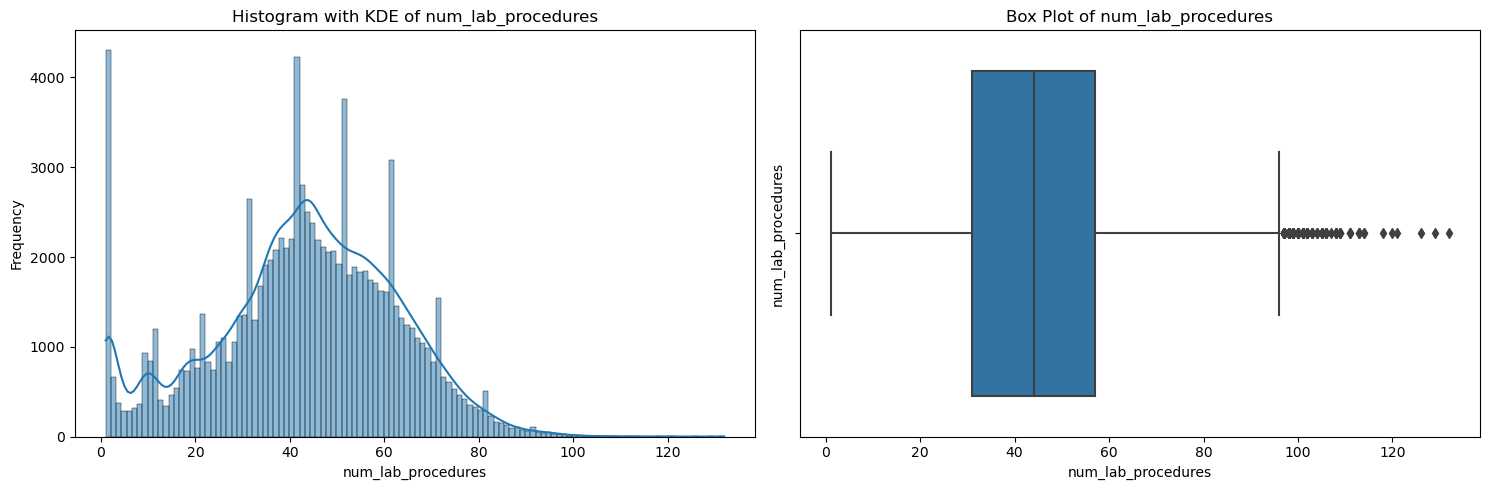

In [50]:
plot_histogram_boxplot_kde(data,'num_lab_procedures')

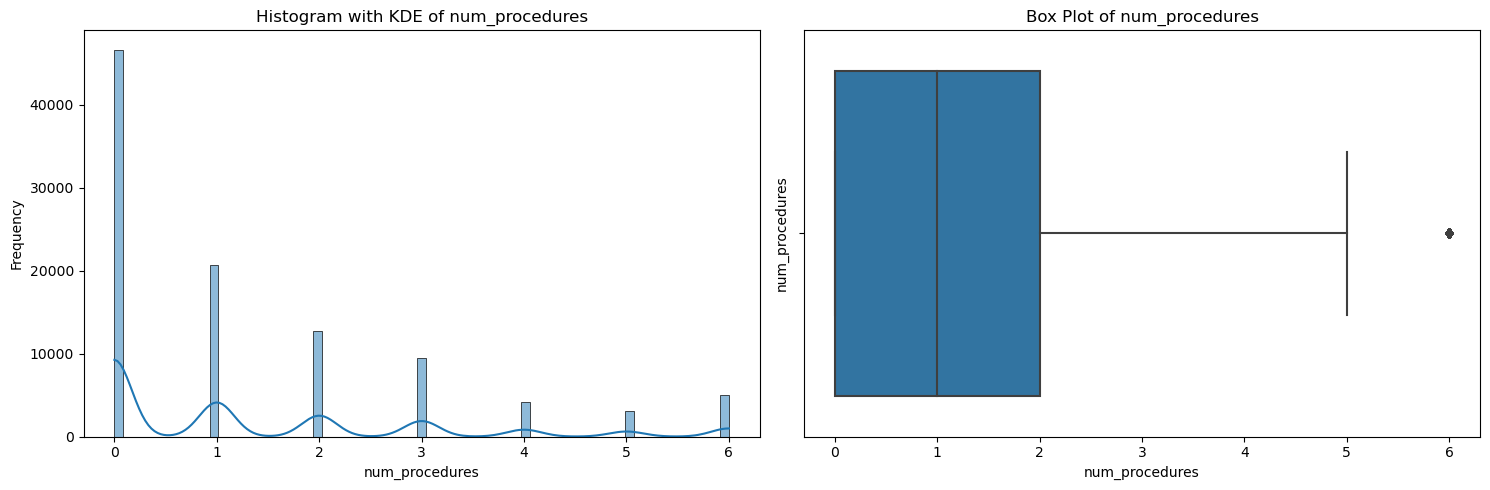

In [51]:
plot_histogram_boxplot_kde(data,'num_procedures')

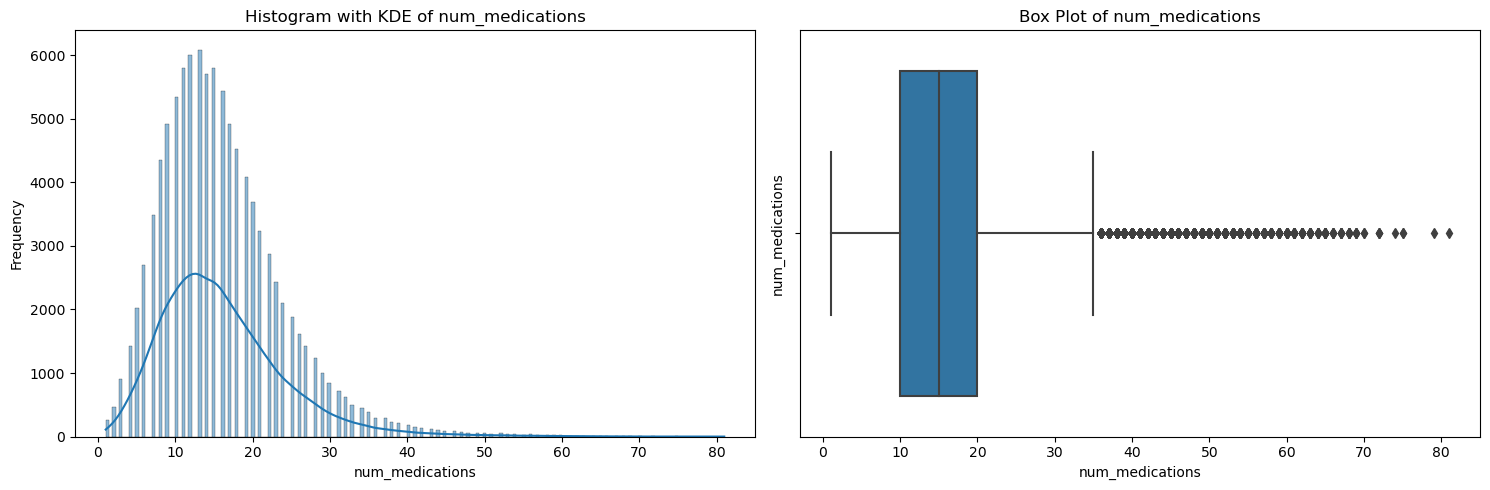

In [52]:
plot_histogram_boxplot_kde(data,'num_medications')

For 'num_medications', the distribution is right-skewed distributions (has a long right tail, the mean position is on the right side of the data). 

This indicates that the majority of patients are prescribed a relatively low number of medications, while a smaller percentage of patients are prescribed a higher number of medications. 

This skewed distribution suggests that there may be a significant proportion of patients with complex medical conditions requiring multiple medications, which could have implications for treatment strategies and healthcare resource allocation.

These outliers will be pre-processed in the next section.

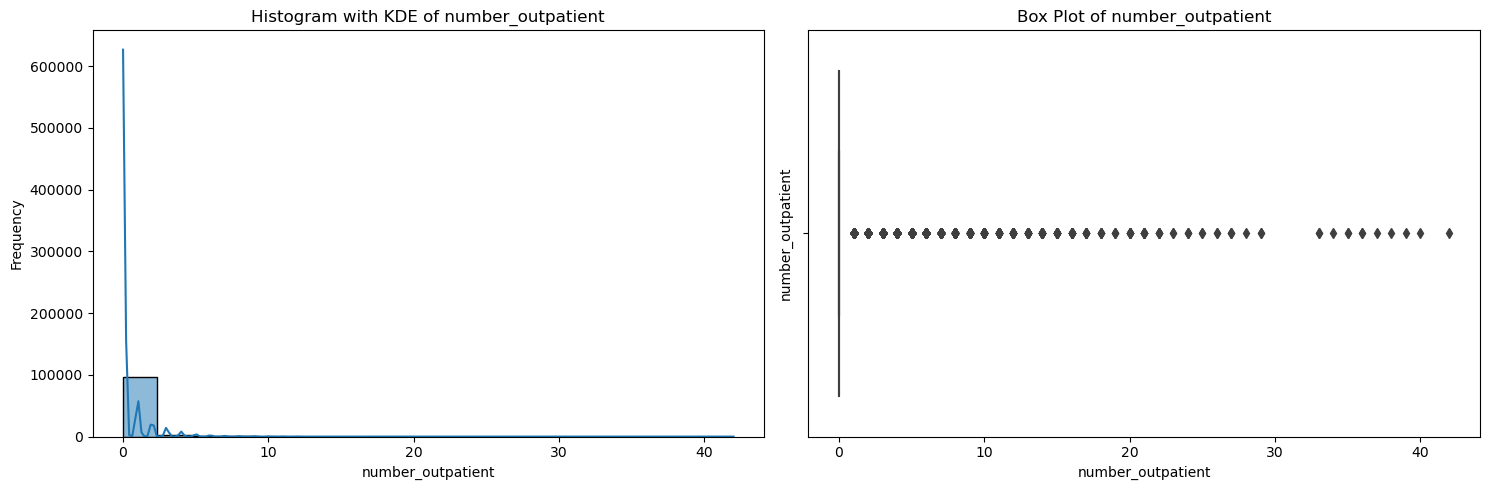

In [53]:
plot_histogram_boxplot_kde(data,'number_outpatient')

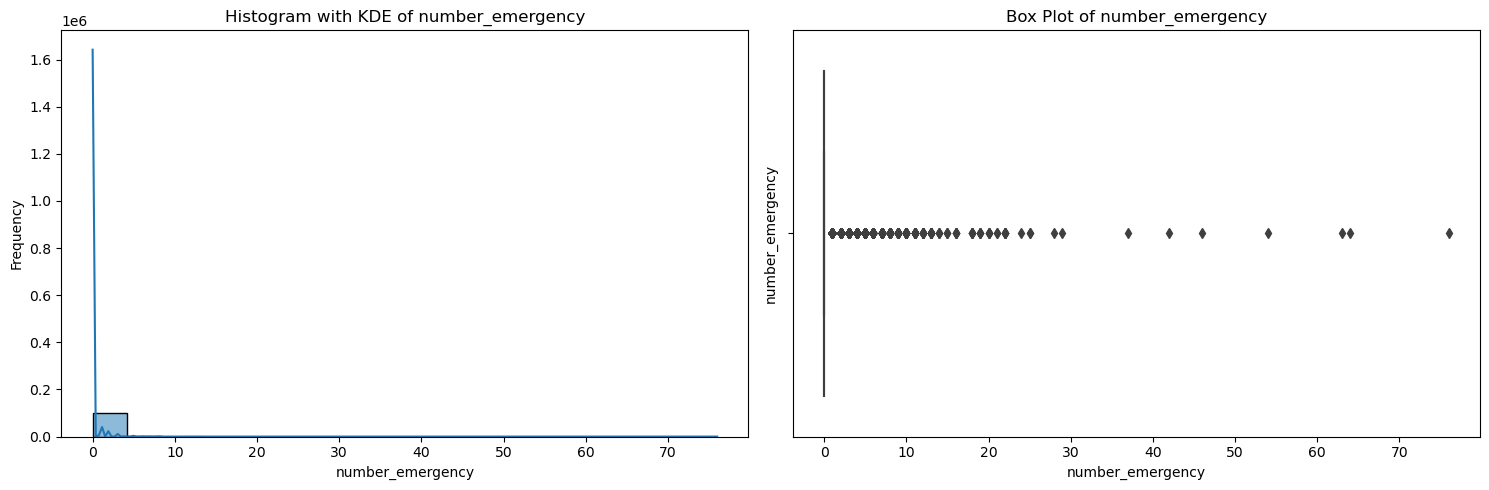

In [54]:
plot_histogram_boxplot_kde(data,'number_emergency')

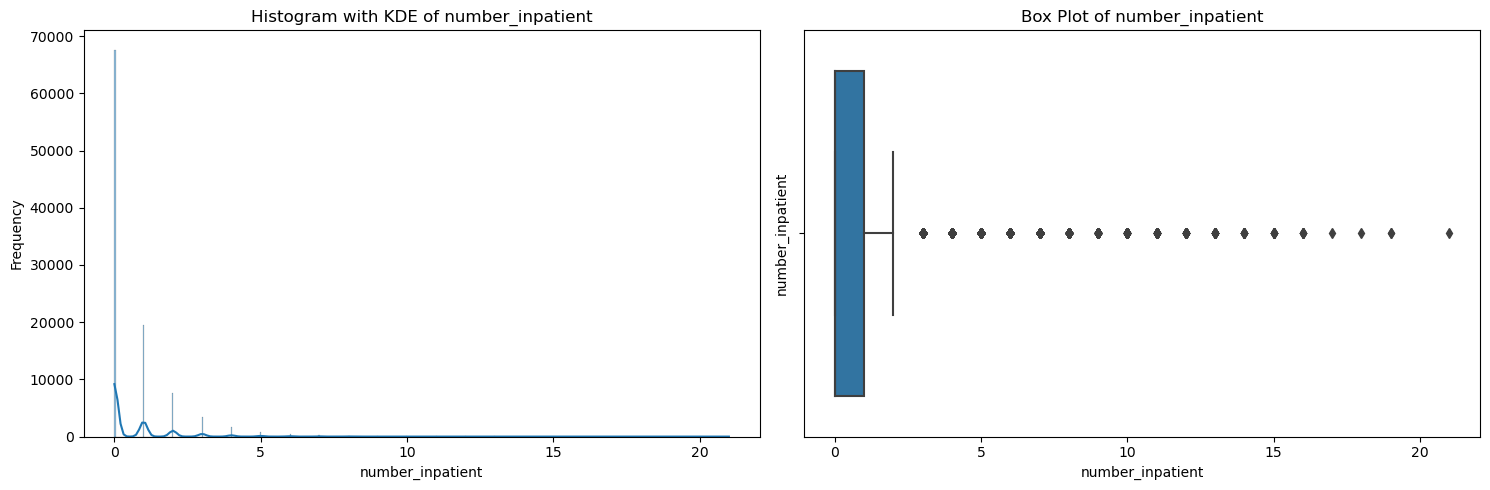

In [55]:
plot_histogram_boxplot_kde(data,'number_inpatient')

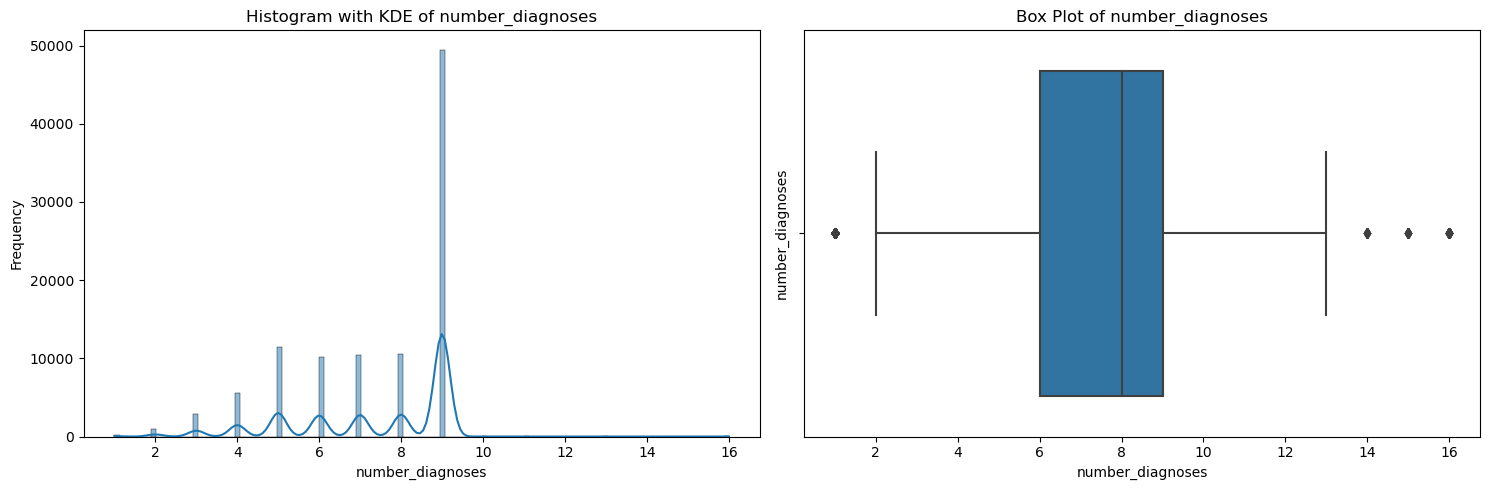

In [56]:
plot_histogram_boxplot_kde(data,'number_diagnoses')

## **2. HANDLYING MISSING VALUES**

In [57]:
print_missing_values(data)

              Column Missing Values  Percentage
0               race           2273    2.233555
1             weight          98569   96.858479
2         payer_code          40256   39.557416
3  medical_specialty          49949   49.082208
4             diag_1             21    0.020636
5             diag_2            358    0.351787
6             diag_3           1423    1.398306


The "weight" column stands out with a significantly high percentage of missing values, while other columns also exhibit varying degrees of missingness.

In [58]:
# Dropping columns with high missing values
data.drop(['weight', 'payer_code', 'medical_specialty'], axis=1, inplace=True)

The columns with high missing values, namely 'weight', 'payer_code', and 'medical_specialty', are dropped

In [59]:
data

encounter_id  patient_nbr             race  gender      age  \
0            2278392      8222157        Caucasian  Female   [0-10)   
1             149190     55629189        Caucasian  Female  [10-20)   
2              64410     86047875  AfricanAmerican  Female  [20-30)   
3             500364     82442376        Caucasian    Male  [30-40)   
4              16680     42519267        Caucasian    Male  [40-50)   
...              ...          ...              ...     ...      ...   
101761     443847548    100162476  AfricanAmerican    Male  [70-80)   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)   
101763     443854148     41088789        Caucasian    Male  [70-80)   
101764     443857166     31693671        Caucasian  Female  [80-90)   
101765     443867222    175429310        Caucasian    Male  [70-80)   

        admission_type_id  discharge_disposition_id  admission_source_id  \
0                       6                        25                    1   
1                       1                         1                    7   
2                       1                         1                    7   
3                       1                         1                    7   
4                       1                         1                    7   
...                   ...                       ...                  ...   
101761                  1                         3                    7   
101762                  1                         4                    5   
101763                  1                         1                    7   
101764                  2                         3                    7   
101765                  1                         1                    7   

        time_in_hospital  num_lab_procedures  ...  citoglipton  insulin  \
0                      1                  41  ...           No       No   
1                      3                  59  ...           No       Up   
2                      2                  11  ...           No       No   
3                      2                  44  ...           No       Up   
4                      1                  51  ...           No   Steady   
...                  ...                 ...  ...          ...      ...   
101761                 3                  51  ...           No     Down   
101762                 5                  33  ...           No   Steady   
101763                 1                  53  ...           No     Down   
101764                10                  45  ...           No       Up   
101765                 6                  13  ...           No       No   

        glyburide-metformin  glipizide-metformin  glimepiride-pioglitazone  \
0                        No                   No                        No   
1                        No                   No                        No   
2                        No                   No                        No   
3                        No                   No                        No   
4                        No                   No                        No   
...                     ...                  ...                       ...   
101761                   No                   No                        No   
101762                   No                   No                        No   
101763                   No                   No                        No   
101764                   No                   No                        No   
101765                   No                   No                        No   

       metformin-rosiglitazone metformin-pioglitazone change  diabetesMed  \
0                           No                     No     No           No   
1                           No                     No     Ch          Yes   
2                           No                     No     No          Yes   
3                           No                     No     Ch          Yes   
4                  

In [60]:
# Imputing missing values in remaining columns
data['race'].fillna('Missing', inplace=True)
data['diag_1'].fillna('Missing', inplace=True)
data['diag_2'].fillna('Missing', inplace=True)
data['diag_3'].fillna('Missing', inplace=True)

The remaining columns are imputed with a specific value, in this case 'Missing', using the fillna function. 

In [61]:
# Verify the updated missing value status
print_missing_values(data)

Empty DataFrame
Columns: [Column, Missing Values, Percentage]
Index: []


We verify the updated missing value status after handling them. We notice that there are no more missing values

## **Additional preprocessing**

### **1. Data Transformation**

In [62]:
data.age.unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [63]:
# Apply log transformation to skewed variables
skewed_cols = ['num_medications']  # Specify the skewed columns
data[skewed_cols] = np.log1p(data[skewed_cols])

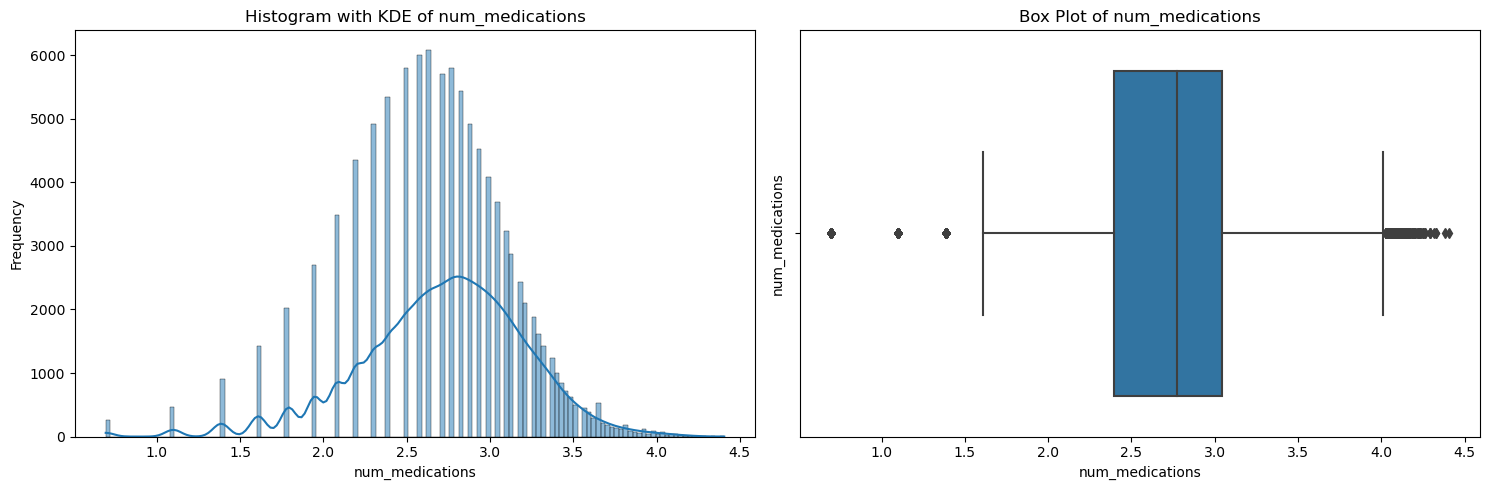

In [64]:
plot_histogram_boxplot_kde(data,'num_medications')

We applied log transformation to skewed variables (num_medications) to achieve a more normal distribution.

In [65]:
# Define a mapping for the age categories
age_mapping = {
    '[0-10)': 'Young',
    '[10-20)': 'Young',
    '[20-30)': 'Middle-aged',
    '[30-40)': 'Middle-aged',
    '[40-50)': 'Middle-aged',
    '[50-60)': 'Middle-aged',
    '[60-70)': 'Senior',
    '[70-80)': 'Senior',
    '[80-90)': 'Senior',
    '[90-100)': 'Senior'
}

# Create a new column 'age_category' based on the mapping
data['age_category'] = data['age'].map(age_mapping)

# Drop the 'age' column
data.drop('age', axis=1, inplace=True)

We performed feature engineering by creating new features based on existing ones, such as age category and drop the age column

In [66]:
data

encounter_id  patient_nbr             race  gender  admission_type_id  \
0            2278392      8222157        Caucasian  Female                  6   
1             149190     55629189        Caucasian  Female                  1   
2              64410     86047875  AfricanAmerican  Female                  1   
3             500364     82442376        Caucasian    Male                  1   
4              16680     42519267        Caucasian    Male                  1   
...              ...          ...              ...     ...                ...   
101761     443847548    100162476  AfricanAmerican    Male                  1   
101762     443847782     74694222  AfricanAmerican  Female                  1   
101763     443854148     41088789        Caucasian    Male                  1   
101764     443857166     31693671        Caucasian  Female                  2   
101765     443867222    175429310        Caucasian    Male                  1   

        discharge_disposition_id  admission_source_id  time_in_hospital  \
0                             25                    1                 1   
1                              1                    7                 3   
2                              1                    7                 2   
3                              1                    7                 2   
4                              1                    7                 1   
...                          ...                  ...               ...   
101761                         3                    7                 3   
101762                         4                    5                 5   
101763                         1                    7                 1   
101764                         3                    7                10   
101765                         1                    7                 6   

        num_lab_procedures  num_procedures  ...  insulin  glyburide-metformin  \
0                       41               0  ...       No                   No   
1                       59               0  ...       Up                   No   
2                       11               5  ...       No                   No   
3                       44               1  ...       Up                   No   
4                       51               0  ...   Steady                   No   
...                    ...             ...  ...      ...                  ...   
101761                  51               0  ...     Down                   No   
101762                  33               3  ...   Steady                   No   
101763                  53               0  ...     Down                   No   
101764                  45               2  ...       Up                   No   
101765                  13               3  ...       No                   No   

        glipizide-metformin  glimepiride-pioglitazone metformin-rosiglitazone  \
0                        No                        No                      No   
1                        No                        No                      No   
2                        No                        No                      No   
3                        No                        No                      No   
4                        No                        No                      No   
...                     ...                       ...                     ...   
101761                   No                        No                      No   
101762                   No                        No                      No   
101763                   No                        No                      No   
101764                   No                        No                      No   
101765                   No                        No                      No   

       metformin-pioglitazone change  diabetesMed readmitted age_category  
0                          No     No           No         NO        Young  
1                          No     Ch

### **2. Scaling**

In [67]:
# Function to print all the numerical columns
def print_numerical_columns(data):
    numerical_columns = data.select_dtypes(include=['int64']).columns
    print("Numerical columns:")
    for column in numerical_columns:
        print(column)

# Call the function to print numerical columns
print_numerical_columns(data)


Numerical columns:
encounter_id
patient_nbr
admission_type_id
discharge_disposition_id
admission_source_id
time_in_hospital
num_lab_procedures
num_procedures
number_outpatient
number_emergency
number_inpatient
number_diagnoses


In [68]:
from sklearn.preprocessing import MinMaxScaler
# Function to scale the numerical columns in a DataFrame using MinMaxScaler.
def scale_numerical_columns(data):

    # Select numerical columns
    numerical_columns = data.select_dtypes(include=['int64']).columns
    
    # Create a MinMaxScaler object
    scaler = MinMaxScaler()
    
    # Scale the numerical columns
    scaled_data = data.copy()
    scaled_data[numerical_columns] = scaler.fit_transform(scaled_data[numerical_columns])
    
    return scaled_data

# Call the function to scale numerical columns
scaled_data = scale_numerical_columns(data)


# Print the scaled DataFrame
scaled_data


encounter_id  patient_nbr             race  gender  admission_type_id  \
0           0.005105     0.043387        Caucasian  Female           0.714286   
1           0.000308     0.293553        Caucasian  Female           0.000000   
2           0.000117     0.454072  AfricanAmerican  Female           0.000000   
3           0.001099     0.435046        Caucasian    Male           0.000000   
4           0.000009     0.224372        Caucasian    Male           0.000000   
...              ...          ...              ...     ...                ...   
101761      0.999956     0.528554  AfricanAmerican    Male           0.000000   
101762      0.999956     0.394159  AfricanAmerican  Female           0.000000   
101763      0.999971     0.216824        Caucasian    Male           0.000000   
101764      0.999977     0.167246        Caucasian  Female           0.142857   
101765      1.000000     0.925735        Caucasian    Male           0.000000   

        discharge_disposition_id  admission_source_id  time_in_hospital  \
0                       0.888889             0.000000          0.000000   
1                       0.000000             0.250000          0.153846   
2                       0.000000             0.250000          0.076923   
3                       0.000000             0.250000          0.076923   
4                       0.000000             0.250000          0.000000   
...                          ...                  ...               ...   
101761                  0.074074             0.250000          0.153846   
101762                  0.111111             0.166667          0.307692   
101763                  0.000000             0.250000          0.000000   
101764                  0.074074             0.250000          0.692308   
101765                  0.000000             0.250000          0.384615   

        num_lab_procedures  num_procedures  ...  insulin  glyburide-metformin  \
0                 0.305344        0.000000  ...       No                   No   
1                 0.442748        0.000000  ...       Up                   No   
2                 0.076336        0.833333  ...       No                   No   
3                 0.328244        0.166667  ...       Up                   No   
4                 0.381679        0.000000  ...   Steady                   No   
...                    ...             ...  ...      ...                  ...   
101761            0.381679        0.000000  ...     Down                   No   
101762            0.244275        0.500000  ...   Steady                   No   
101763            0.396947        0.000000  ...     Down                   No   
101764            0.335878        0.333333  ...       Up                   No   
101765            0.091603        0.500000  ...       No                   No   

        glipizide-metformin  glimepiride-pioglitazone metformin-rosiglitazone  \
0                        No                        No                      No   
1                        No                        No                      No   
2                        No                        No                      No   
3                        No                        No                      No   
4                        No                        No                      No   
...                     ...                       ...                     ...   
101761                   No                        No                      No   
101762                   No                        No                      No   
101763                   No                        No                      No   
101764                   No                        No                      No   
101765                   No                        No                      No   

       metformin-pioglitazone change  diabetesMed readmitted age_category  
0                          No     No           No         NO        Young  
1                          No     Ch

We normalized numerical features to a specific range ([0, 1]) using Min-Max scaling.

Scaling helps ensure that features are on a similar scale, which can be beneficial for certain machine learning algorithms.

### **3. Encoding Categorical Variables**

Convert categorical variables into numerical representations for machine learning algorithms.

One-hot encoding: Create binary columns for each unique category in a categorical variable.

Label encoding: Assign a unique numerical label to each category. Used only for encoding the target variable (dependent variable) and not for encoding features (independent variables).

In [85]:
#Function to perform one-hot encoding on categorical columns in a DataFrame, excluding the target column.
def one_hot_encode_categorical_columns(data, target_column):
    
    # Select categorical columns (excluding the target column)
    categorical_columns = data.select_dtypes(include=['object']).columns.drop(target_column)
    
    # Perform one-hot encoding
    encoded_data = pd.get_dummies(data, columns=categorical_columns)
    
    return encoded_data

# Call the function to perform one-hot encoding on categorical columns
encoded_data = one_hot_encode_categorical_columns(scaled_data, 'readmitted')

# Print the encoded DataFrame
encoded_data

encounter_id  patient_nbr  admission_type_id  \
0           0.005105     0.043387           0.714286   
1           0.000308     0.293553           0.000000   
2           0.000117     0.454072           0.000000   
3           0.001099     0.435046           0.000000   
4           0.000009     0.224372           0.000000   
...              ...          ...                ...   
101761      0.999956     0.528554           0.000000   
101762      0.999956     0.394159           0.000000   
101763      0.999971     0.216824           0.000000   
101764      0.999977     0.167246           0.142857   
101765      1.000000     0.925735           0.000000   

        discharge_disposition_id  admission_source_id  time_in_hospital  \
0                       0.888889             0.000000          0.000000   
1                       0.000000             0.250000          0.153846   
2                       0.000000             0.250000          0.076923   
3                       0.000000             0.250000          0.076923   
4                       0.000000             0.250000          0.000000   
...                          ...                  ...               ...   
101761                  0.074074             0.250000          0.153846   
101762                  0.111111             0.166667          0.307692   
101763                  0.000000             0.250000          0.000000   
101764                  0.074074             0.250000          0.692308   
101765                  0.000000             0.250000          0.384615   

        num_lab_procedures  num_procedures  num_medications  \
0                 0.305344        0.000000         0.693147   
1                 0.442748        0.000000         2.944439   
2                 0.076336        0.833333         2.639057   
3                 0.328244        0.166667         2.833213   
4                 0.381679        0.000000         2.197225   
...                    ...             ...              ...   
101761            0.381679        0.000000         2.833213   
101762            0.244275        0.500000         2.944439   
101763            0.396947        0.000000         2.302585   
101764            0.335878        0.333333         3.091042   
101765            0.091603        0.500000         1.386294   

        number_outpatient  ...  metformin-rosiglitazone_Steady  \
0                0.000000  ...                               0   
1                0.000000  ...                               0   
2                0.047619  ...                               0   
3                0.000000  ...                               0   
4                0.000000  ...                               0   
...                   ...  ...                             ...   
101761           0.000000  ...                               0   
101762           0.000000  ...                               0   
101763           0.023810  ...                               0   
101764           0.000000  ...                               0   
101765           0.000000  ...                               0   

        metformin-pioglitazone_No  metformin-pioglitazone_Steady change_Ch  \
0                               1                              0         0   
1                               1                              0         1   
2                               1                              0         0   
3                               1                              0         1   
4                               1                              0         1   
...                           ...                            ...       ...   
101761                          1                              0         1   
101762                          1                              0         0   
101763                          1                              0         1   
101764                          1                              0         1   
101765                    

In [87]:
encoded_data.readmitted.unique()

array(['NO', '>30', '<30'], dtype=object)

In [71]:
encoded_data.columns

Index(['encounter_id', 'patient_nbr', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient',
       ...
       'metformin-rosiglitazone_Steady', 'metformin-pioglitazone_No',
       'metformin-pioglitazone_Steady', 'change_Ch', 'change_No',
       'diabetesMed_No', 'diabetesMed_Yes', 'age_category_Middle-aged',
       'age_category_Senior', 'age_category_Young'],
      dtype='object', length=2365)

In [88]:
from sklearn.preprocessing import LabelEncoder
#Function to perform label encoding on a specific column in a DataFrame.

def label_encode_column(data, column):
    encoded_data = data.copy()
    label_encoder = LabelEncoder()
    encoded_data[column] = label_encoder.fit_transform(encoded_data[column])
    
    return encoded_data

# Perform label encoding on the 'readmitted' column in 'encoded_data'
encoded_data = label_encode_column(encoded_data, 'readmitted')

# Print the encoded DataFrame
encoded_data


encounter_id  patient_nbr  admission_type_id  \
0           0.005105     0.043387           0.714286   
1           0.000308     0.293553           0.000000   
2           0.000117     0.454072           0.000000   
3           0.001099     0.435046           0.000000   
4           0.000009     0.224372           0.000000   
...              ...          ...                ...   
101761      0.999956     0.528554           0.000000   
101762      0.999956     0.394159           0.000000   
101763      0.999971     0.216824           0.000000   
101764      0.999977     0.167246           0.142857   
101765      1.000000     0.925735           0.000000   

        discharge_disposition_id  admission_source_id  time_in_hospital  \
0                       0.888889             0.000000          0.000000   
1                       0.000000             0.250000          0.153846   
2                       0.000000             0.250000          0.076923   
3                       0.000000             0.250000          0.076923   
4                       0.000000             0.250000          0.000000   
...                          ...                  ...               ...   
101761                  0.074074             0.250000          0.153846   
101762                  0.111111             0.166667          0.307692   
101763                  0.000000             0.250000          0.000000   
101764                  0.074074             0.250000          0.692308   
101765                  0.000000             0.250000          0.384615   

        num_lab_procedures  num_procedures  num_medications  \
0                 0.305344        0.000000         0.693147   
1                 0.442748        0.000000         2.944439   
2                 0.076336        0.833333         2.639057   
3                 0.328244        0.166667         2.833213   
4                 0.381679        0.000000         2.197225   
...                    ...             ...              ...   
101761            0.381679        0.000000         2.833213   
101762            0.244275        0.500000         2.944439   
101763            0.396947        0.000000         2.302585   
101764            0.335878        0.333333         3.091042   
101765            0.091603        0.500000         1.386294   

        number_outpatient  ...  metformin-rosiglitazone_Steady  \
0                0.000000  ...                               0   
1                0.000000  ...                               0   
2                0.047619  ...                               0   
3                0.000000  ...                               0   
4                0.000000  ...                               0   
...                   ...  ...                             ...   
101761           0.000000  ...                               0   
101762           0.000000  ...                               0   
101763           0.023810  ...                               0   
101764           0.000000  ...                               0   
101765           0.000000  ...                               0   

        metformin-pioglitazone_No  metformin-pioglitazone_Steady  change_Ch  \
0                               1                              0          0   
1                               1                              0          1   
2                               1                              0          0   
3                               1                              0          1   
4                               1                              0          1   
...                           ...                            ...        ...   
101761                          1                              0          1   
101762                          1                              0          0   
101763                          1                              0          1   
101764                          1                              0          1   
101765         

In [89]:
encoded_data.readmitted.unique()

array([2, 1, 0])

### **4. Handling Imbalanced Data**

In [90]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

# Perform oversampling using SMOTE on the imbalanced target variable
X = encoded_data.drop('readmitted', axis=1)
y = encoded_data['readmitted']


In [91]:
y.value_counts()

2    54864
1    35545
0    11357
Name: readmitted, dtype: int64

There is a class imbalance in the dataset you provided. 

The class distribution is imbalanced because the number of instances in each class is significantly different. Class 2 has the highest number of instances, followed by Class 1, and Class 0 has the fewest instances.

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a classifier on the resampled data
classifier = LogisticRegression()
classifier.fit(X_train_resampled, y_train_resampled)

# Evaluate the classifier on the test set
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.22      0.10      0.14      2285
           1       0.48      0.44      0.46      7117
           2       0.63      0.74      0.68     10952

    accuracy                           0.56     20354
   macro avg       0.44      0.42      0.42     20354
weighted avg       0.53      0.56      0.54     20354



In [96]:
from sklearn.ensemble import RandomForestClassifier

#Function to select the most important features using feature importance from a Random Forest model.
def select_features(data, target_column, num_features):

    # Separate features and target
    X = data.drop(target_column, axis=1)
    y = data[target_column]
    
    # Create a Random Forest classifier
    rf = RandomForestClassifier(random_state=42)
    
    # Fit the model and calculate feature importance
    rf.fit(X, y)
    feature_importance = rf.feature_importances_
    
    # Get the indices of the top features
    top_indices = feature_importance.argsort()[-num_features:][::-1]
    
    # Get the names of the top features
    selected_features = X.columns[top_indices].tolist()
    
    return selected_features

# Set the number of top features to select
num_top_features = 25

# Call the function to select the most important features
selected_features = select_features(encoded_data, 'readmitted', num_top_features)

# Print the selected features
print("Selected Features:")
for feature in selected_features:
    print(feature)


Selected Features:
patient_nbr
encounter_id
num_lab_procedures
num_medications
time_in_hospital
number_inpatient
discharge_disposition_id
number_diagnoses
num_procedures
admission_type_id
admission_source_id
number_outpatient
number_emergency
gender_Male
gender_Female
race_Caucasian
race_AfricanAmerican
insulin_Steady
A1Cresult_None
age_category_Middle-aged
age_category_Senior
insulin_No
diag_3_250
metformin_No
metformin_Steady


In [94]:
encoded_data

encounter_id  patient_nbr  admission_type_id  \
0           0.005105     0.043387           0.714286   
1           0.000308     0.293553           0.000000   
2           0.000117     0.454072           0.000000   
3           0.001099     0.435046           0.000000   
4           0.000009     0.224372           0.000000   
...              ...          ...                ...   
101761      0.999956     0.528554           0.000000   
101762      0.999956     0.394159           0.000000   
101763      0.999971     0.216824           0.000000   
101764      0.999977     0.167246           0.142857   
101765      1.000000     0.925735           0.000000   

        discharge_disposition_id  admission_source_id  time_in_hospital  \
0                       0.888889             0.000000          0.000000   
1                       0.000000             0.250000          0.153846   
2                       0.000000             0.250000          0.076923   
3                       0.000000             0.250000          0.076923   
4                       0.000000             0.250000          0.000000   
...                          ...                  ...               ...   
101761                  0.074074             0.250000          0.153846   
101762                  0.111111             0.166667          0.307692   
101763                  0.000000             0.250000          0.000000   
101764                  0.074074             0.250000          0.692308   
101765                  0.000000             0.250000          0.384615   

        num_lab_procedures  num_procedures  num_medications  \
0                 0.305344        0.000000         0.693147   
1                 0.442748        0.000000         2.944439   
2                 0.076336        0.833333         2.639057   
3                 0.328244        0.166667         2.833213   
4                 0.381679        0.000000         2.197225   
...                    ...             ...              ...   
101761            0.381679        0.000000         2.833213   
101762            0.244275        0.500000         2.944439   
101763            0.396947        0.000000         2.302585   
101764            0.335878        0.333333         3.091042   
101765            0.091603        0.500000         1.386294   

        number_outpatient  ...  metformin-rosiglitazone_Steady  \
0                0.000000  ...                               0   
1                0.000000  ...                               0   
2                0.047619  ...                               0   
3                0.000000  ...                               0   
4                0.000000  ...                               0   
...                   ...  ...                             ...   
101761           0.000000  ...                               0   
101762           0.000000  ...                               0   
101763           0.023810  ...                               0   
101764           0.000000  ...                               0   
101765           0.000000  ...                               0   

        metformin-pioglitazone_No  metformin-pioglitazone_Steady  change_Ch  \
0                               1                              0          0   
1                               1                              0          1   
2                               1                              0          0   
3                               1                              0          1   
4                               1                              0          1   
...                           ...                            ...        ...   
101761                          1                              0          1   
101762                          1                              0          0   
101763                          1                              0          1   
101764                          1                              0          1   
101765         